# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore') # 경고 메세지 무시

### 데이터 셋 읽어오기

In [2]:
df_train = pd.read_csv("../data/train.csv") # 학습용 데이터
df_test = pd.read_csv("../data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [3]:
df_train.tail() # 학습용 데이터 살펴보기

bant_submit          customer_country business_unit  \
59294         1.00           /Sląskie/Poland            AS   
59295         0.75      /Bogotá DC /Colombia            AS   
59296         0.75               /Pisco/Peru            AS   
59297         1.00  /santa cruz bolivia/Peru            AS   
59298         0.75             /paris/France      Solution   

       com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
59294                   NaN         33747           End Customer         SMB   
59295                  0.04         35420  Specifier/ Influencer  Enterprise   
59296                  0.04         19249  Specifier/ Influencer  Enterprise   
59297                  0.04         40327                    NaN  Enterprise   
59298                   NaN         30268                    NaN  Enterprise   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
59294                      NaN               NaN               NaN  ...   
59295                      NaN               NaN               NaN  ...   
59296                      NaN               NaN               NaN  ...   
59297                      NaN               NaN               NaN  ...   
59298                      NaN               NaN               NaN  ...   

       response_corporate    expected_timeline  ver_cus ver_pro  \
59294               LGEPL  3 months ~ 6 months        0       0   
59295               LGECB    9 months ~ 1 year        0       0   
59296               LGEPR   less than 3 months        0       0   
59297               LGEPR     more than a year        0       0   
59298               LGEKR   less than 3 months        0       0   

      ver_win_rate_x ver_win_ratio_per_bu    business_area business_subarea  \
59294       0.000026             0.028777  public facility           Others   
59295       0.000026             0.028777  public facility              NaN   
59296       0.000026             0.028777  public facility              NaN   
59297       0.000026             0.028777  public facility              NaN   
59298       0.000026                  NaN  public facility              NaN   

      lead_owner is_converted  
59294        694        False  
59295         39        False  
59296        125        False  
59297        134        False  
59298        441        False  

[5 rows x 29 columns]

타겟변수(is_converted)를 포함하여 29개의 칼럼으로 이루어져 있고  
59298개의 데이터를 가짐을 확인할수 있다.

In [4]:
df_test.tail() # 테스트 데이터 살펴보기

id  bant_submit            customer_country business_unit  \
5266  13855         0.50           /São Paulo/Brazil            AS   
5267   7979         0.25  General /  / United States            IT   
5268  12887         0.75      / OURO BRANCO / Brazil            AS   
5269  17530         0.00                /  / Germany            IT   
5270   4330         0.25           / Ongole  / India            AS   

      com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
5266                   NaN         40292                    NaN  Enterprise   
5267                   NaN         47466                    NaN  Enterprise   
5268                   NaN         46227  Specifier/ Influencer  Enterprise   
5269                   NaN         45667           End Customer         SMB   
5270                   NaN         23646           End Customer  Enterprise   

      historical_existing_cnt  id_strategic_ver  ...  response_corporate  \
5266                     10.0               NaN  ...               LGESP   
5267                      0.0               NaN  ...               LGEUS   
5268                      NaN               NaN  ...               LGESP   
5269                      NaN               NaN  ...               LGEDG   
5270                      NaN               NaN  ...               LGEIL   

       expected_timeline ver_cus  ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
5266                 NaN       0        0            NaN                  NaN   
5267                 NaN       0        0            NaN                  NaN   
5268  less than 3 months       0        0            NaN                  NaN   
5269                 NaN       0        0            NaN                  NaN   
5270                 NaN       0        0            NaN                  NaN   

     business_area business_subarea lead_owner is_converted  
5266           NaN              NaN         97        False  
5267           NaN              NaN        438        False  
5268           NaN              NaN         97         True  
5269           NaN              NaN        429        False  
5270           NaN              NaN          4         True  

[5 rows x 30 columns]

테스트 데이터의 경우 id 칼럼이 추가되는것을 확인할수 있다.

훈련용 데이터에 대해서 가지고 있는 정보를 확인하면 다음과 같다.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

### 결측치 확인

In [6]:
df_train.isnull().sum() / df_train.shape[0]

bant_submit                0.000000
customer_country           0.016560
business_unit              0.000000
com_reg_ver_win_rate       0.754330
customer_idx               0.000000
customer_type              0.741345
enterprise                 0.000000
historical_existing_cnt    0.768023
id_strategic_ver           0.941921
it_strategic_ver           0.981096
idit_strategic_ver         0.923017
customer_job               0.315908
lead_desc_length           0.000000
inquiry_type               0.015869
product_category           0.326717
product_subcategory        0.844264
product_modelname          0.844365
customer_country.1         0.016560
customer_position          0.000000
response_corporate         0.000000
expected_timeline          0.520464
ver_cus                    0.000000
ver_pro                    0.000000
ver_win_rate_x             0.689421
ver_win_ratio_per_bu       0.741918
business_area              0.689421
business_subarea           0.906811
lead_owner                 0

결측치를 포함하고 있는 변수들이 있음을 확인할수 있다.

### 이상치 확인

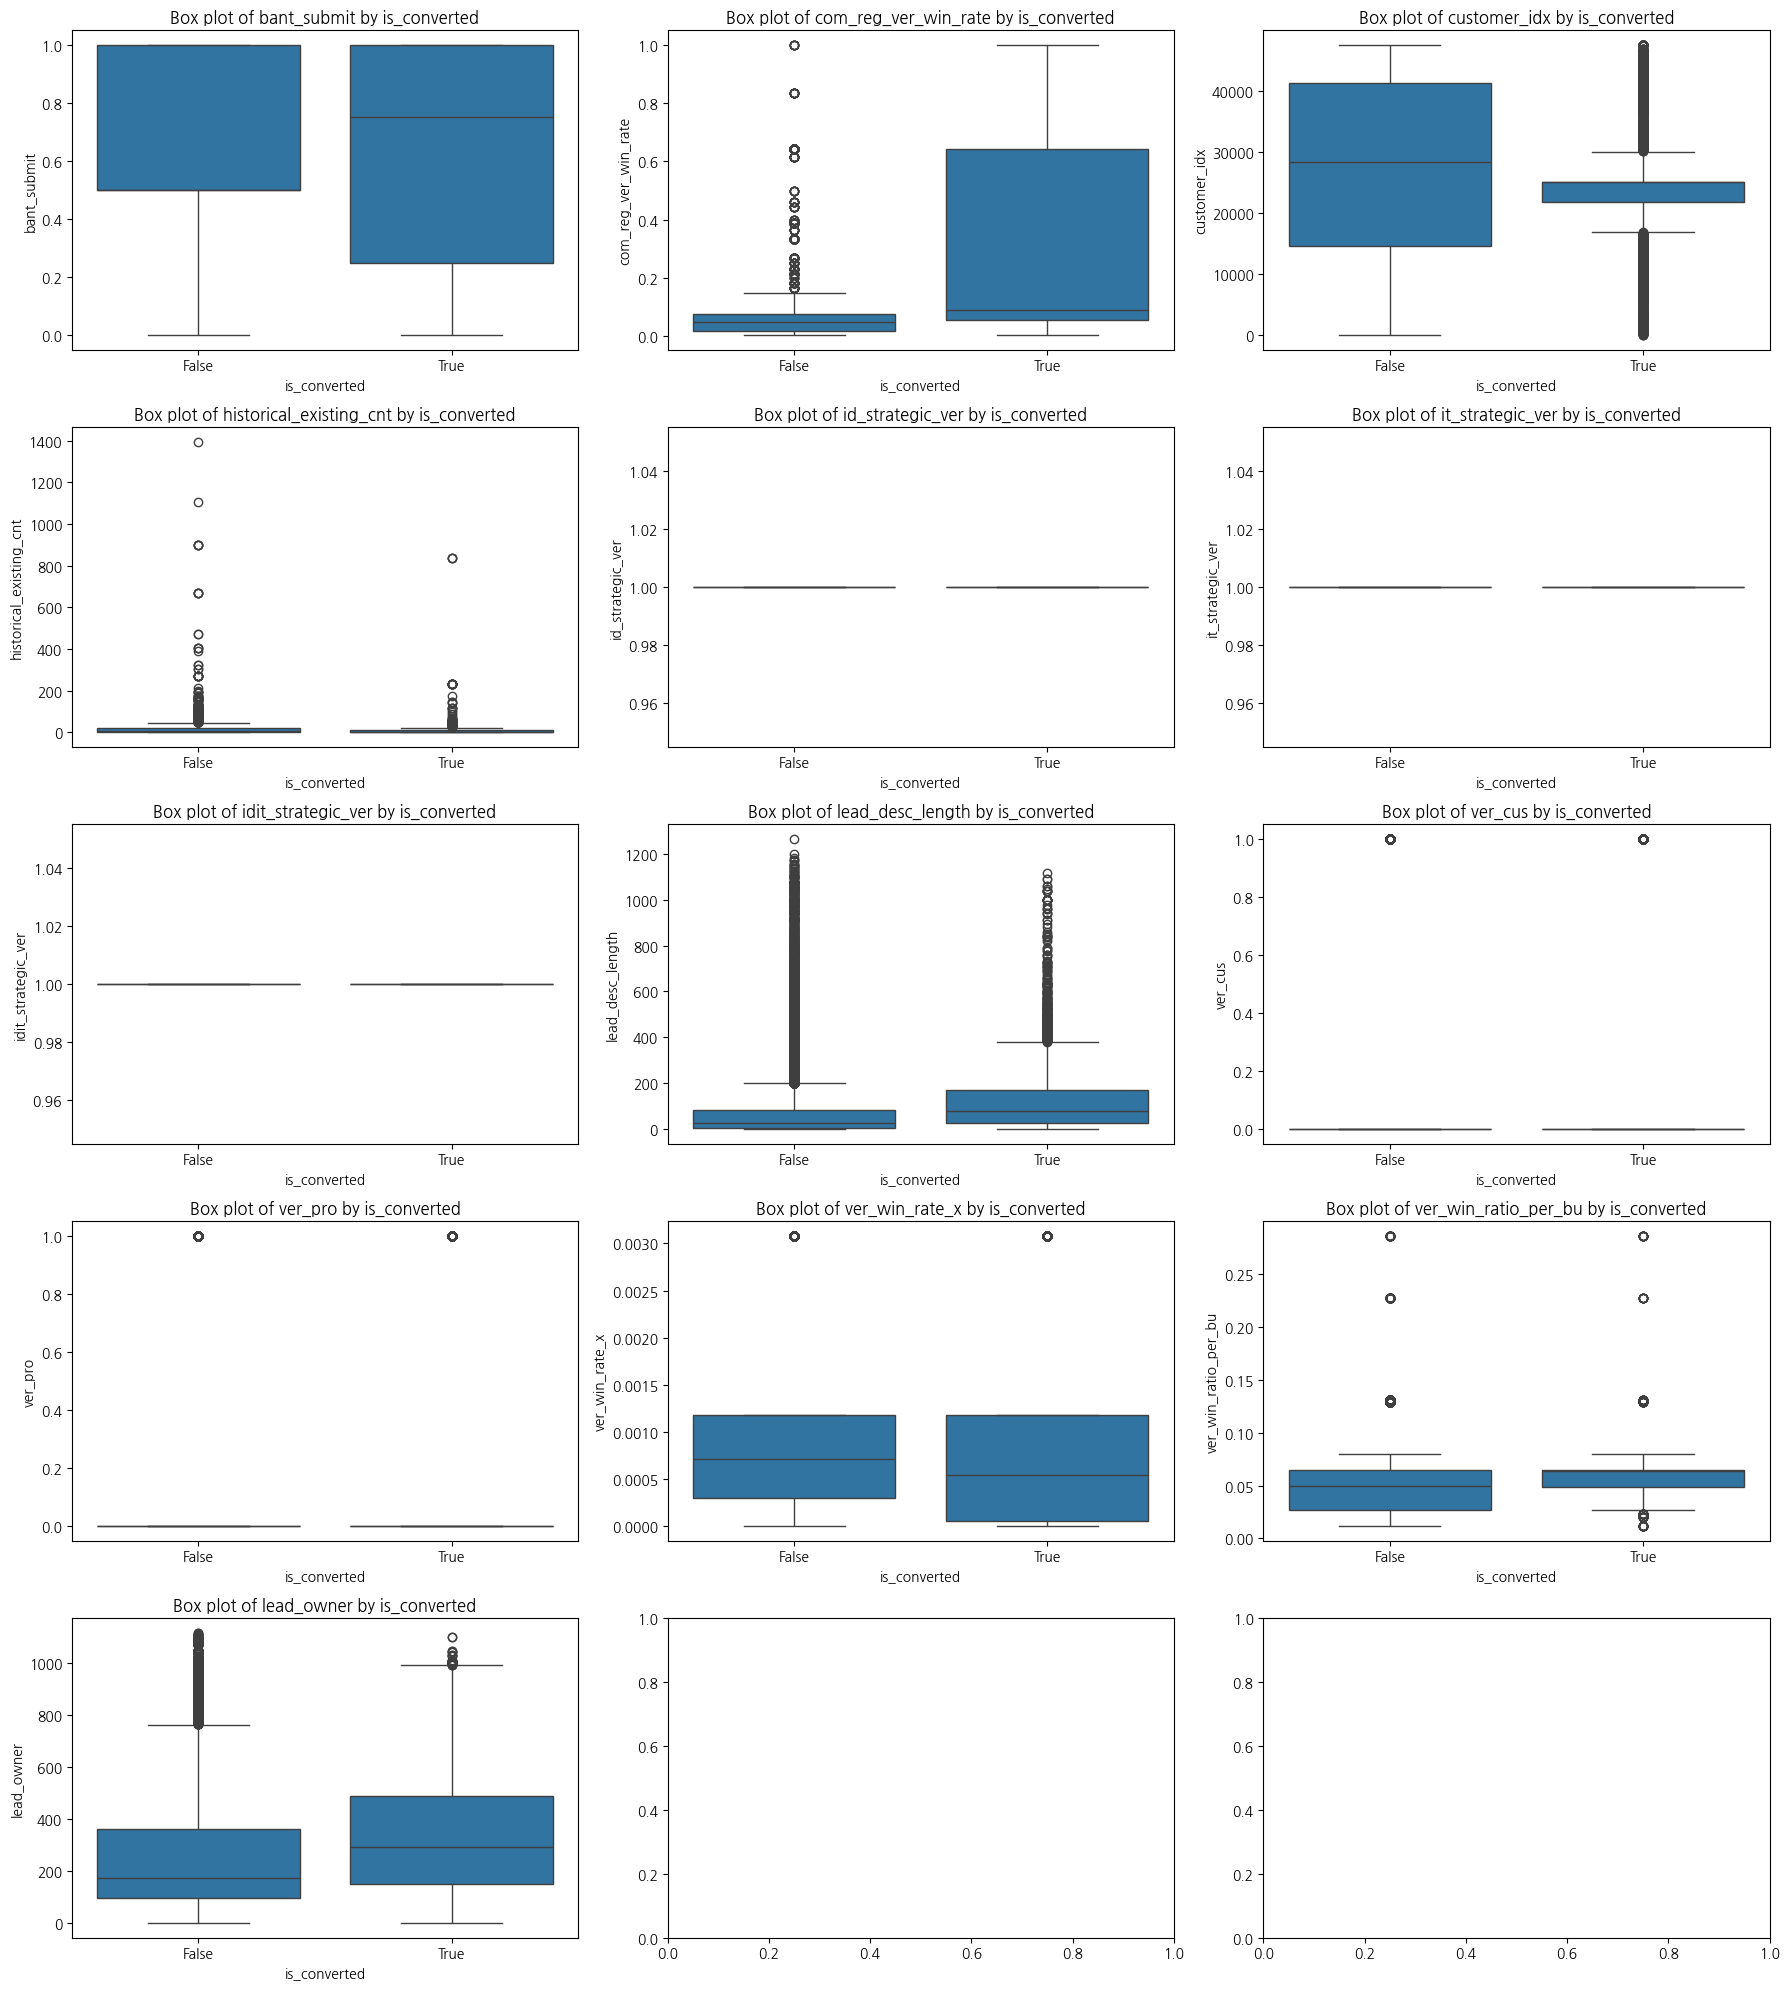

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 선택
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 변수의 개수에 따라 적절한 행과 열의 개수 설정
n = len(numeric_vars)
ncols = 3  # 열의 개수를 설정
nrows = n // ncols if n % ncols == 0 else n // ncols + 1  # 행의 개수 계산

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*4))

for i, var in enumerate(numeric_vars):
    r = i // ncols
    c = i % ncols
    sns.boxplot(x='is_converted', y=var, data=df_train, ax=axs[r, c])
    axs[r, c].set_title('Box plot of ' + var + ' by is_converted')

plt.tight_layout()
plt.show()


## 2. 데이터 전처리

### 각 변수별 확인

일단은 크게 처리할만한 부분만 처리하면서 진행해보았음

#### 1. bant_submit

MQL 구성 요소들 중  
[1] Budget(예산)  
[2] Title(고객의 직책/직급)  
[3] Needs(요구사항)  
[4] Timeline(희망 납기일)  
4가지 항목에 대해서 작성된 값의 비율

In [8]:
df_train['bant_submit'].value_counts()

bant_submit
0.50    17192
1.00    17061
0.25    12852
0.75    11681
0.00      513
Name: count, dtype: int64

결측지 확인

In [9]:
print(df_train['bant_submit'].isnull().sum())

0


#### 2. customer_country

고객의 국적

In [10]:
df_train['customer_country'].value_counts()

customer_country
//India                                   3037
/São Paulo/Brazil                         1344
//United States                            962
//United Kingdom                           805
//Saudi Arabia                             718
                                          ... 
/Hydrated/India                              1
/Tirurangadi, Malappuram, Kerala/India       1
/Canoinhas / SC/Brazil                       1
/Tupã/SP/Brazil                              1
/paris/France                                1
Name: count, Length: 15399, dtype: int64

In [11]:
import re
import numpy as np

def process_data(df, column_name):
    for i, entry in enumerate(df[column_name]):
        if isinstance(entry, str):
            # 값이 '/'로 끝나는 경우
            if entry.endswith('/'):
                df.at[i, column_name] = np.nan
            else:
                # '/' 기준으로 토큰화
                tokens = [token.strip() for token in re.split('/', entry) if token.strip() != '']
                if tokens:
                    df.at[i, column_name] = tokens[-1]
                else:
                    df.at[i, column_name] = np.nan
        else:
            df.at[i, column_name] = np.nan
    return df


In [12]:
df_train = process_data(df_train, "customer_country")
df_test = process_data(df_test, "customer_country")

In [13]:
df_train['customer_country'].value_counts()

customer_country
India                                          16849
Brazil                                          8739
United States                                   3798
Mexico                                          2753
Philippines                                     2569
                                               ...  
6111 W Plano Pkwy #2100PlanoTX75093                1
100 Sabine River Dr.HuttoTX78634                   1
6300 Harry Hines BlvdSte. 1400DallasTX75235        1
100 first stSan FranciscoCA94015                   1
Manaus                                             1
Name: count, Length: 543, dtype: int64

일단은 적은갯수에 대해서 따로 잘라내는 작업은 주석처리

In [14]:
# 'customer_country'의 빈도 계산
counts = df_train['customer_country'].value_counts()

# 빈도가 4이하인 국가를 찾음
single_occurrences = counts[counts <= 4].index

# 빈도가 4이하인 국가를 NaN으로 설정
df_train.loc[df_train['customer_country'].isin(single_occurrences), 'customer_country'] = np.nan

In [15]:
df_train['customer_country'].value_counts()

customer_country
India            16849
Brazil            8739
United States     3798
Mexico            2753
Philippines       2569
                 ...  
Sudan                5
Kazakhstan           5
Burkina Faso         5
Antigua              5
Armenia              5
Name: count, Length: 133, dtype: int64

In [16]:
print(df_train['customer_country'].isnull().sum())

3562


#### 3. business_unit

MQL 요청 상품에 대응되는 사업부

In [17]:
df_train['business_unit'].value_counts()

business_unit
ID          25563
AS          24774
IT           8664
Solution      296
CM              2
Name: count, dtype: int64

In [18]:
cm_data = df_train[df_train['business_unit'] == 'CM']
print(cm_data)

       bant_submit customer_country business_unit  com_reg_ver_win_rate  \
52519          0.5           Brazil            CM                   NaN   
52520          0.5           Brazil            CM                   NaN   

       customer_idx customer_type  enterprise  historical_existing_cnt  \
52519         24728           NaN  Enterprise                      NaN   
52520         24728           NaN  Enterprise                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
52519               NaN               NaN  ...               LGESP   
52520               NaN               NaN  ...               LGESP   

      expected_timeline  ver_cus ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
52519               NaN        0       0            NaN                  NaN   
52520               NaN        0       0            NaN                  NaN   

      business_area business_subarea lead_owner is_converted  
52519           NaN              NaN

business_unit의 값아 CM 데이터를 제거하기에는 타겟변수(is_converted)에서 모두 False라는 값을 도출해 냄과 동시에  
다른 변수에서 NaN 값으로 대부분 채워져있는것을 보면 CM일수록 is_converted일 가능성이 높다고 판단  
따라서 drop하지않고 그대로 유지(물론 test 데이터에는 CM값이 있지는 않음)

#### 4. com_reg_ver_win_rate

[1] Vertical Level 1  
[2] business unit  
[3] region  
3가지 값을 기준으로 oppty 비율을 계산

In [19]:
df_train['com_reg_ver_win_rate'].value_counts()

com_reg_ver_win_rate
0.074949    1130
0.003937     803
0.073248     791
0.642857     782
0.003788     713
            ... 
0.363636      13
0.444444      12
0.400000      12
1.000000      10
0.200000       5
Name: count, Length: 80, dtype: int64

In [20]:
df_train['com_reg_ver_win_rate'].value_counts().sum()

14568

결측치 갯수 확인

In [21]:
print(df_train['com_reg_ver_win_rate'].isnull().sum())

44731


결측치에 대해서 값을 계산해서 넣어줄수 있으면 좋음

business_area’, ‘business_unit’,'customer_country’ 각각이 [1],[2],[3]에 해당한다고 추측정도만 한 상태

In [22]:
grouped_df = df_train.groupby(['business_area', 'business_unit', 'com_reg_ver_win_rate'])['customer_country'].nunique()

print(grouped_df)

business_area       business_unit  com_reg_ver_win_rate
corporate / office  AS             0.003937                15
                                   0.040816                21
                                   0.066667                10
                                   0.088889                 1
                    ID             0.019900                23
                                                           ..
special purpose     ID             0.116279                13
                                   0.333333                 2
transportation      ID             0.025000                12
                                   0.047619                11
                                   0.833333                 1
Name: customer_country, Length: 96, dtype: int64


유의미함을 찾지 못함

In [23]:
# 'com_reg_ver_win_rate' 변수에서 NaN 값을 0으로 대체
df_train['com_reg_ver_win_rate'] = df_train['com_reg_ver_win_rate'].fillna(0)
df_test['com_reg_ver_win_rate'] = df_test['com_reg_ver_win_rate'].fillna(0)

#### 5. customer_idx

고객의 회사명

In [24]:
df_train['customer_idx'].value_counts()

customer_idx
47466    7686
25096    2421
37680     367
18030     331
21321     162
         ... 
39487       1
41241       1
39422       1
22515       1
30268       1
Name: count, Length: 35112, dtype: int64

#### 6. customer_type

고객 유형

In [25]:
df_train['customer_type'].value_counts()

customer_type
End-Customer                    6647
End Customer                    3996
Specifier/ Influencer           2525
Channel Partner                 1368
Service Partner                  349
Solution Eco-Partner             146
Installer/Contractor              52
Specifier / Influencer            43
Corporate                         31
HVAC Engineer                     23
Engineer                          20
Developer                         17
Technician                        16
Consultant                        15
Other                             10
Home Owner                        10
End-user                           8
Manager / Director                 8
Software/Solution Provider         7
Etc.                               6
Architect/Consultant               5
Homeowner                          5
Reseller                           5
Installer                          5
Interior Designer                  5
Distributor                        4
Others                  

In [26]:
# 카테고리 재할당
df_train['customer_type'] = df_train['customer_type'].replace({
    'Others': 'Other',
    'Etc.': 'Other',
    'Software / Solution Provider': 'Software/Solution Provider',
    'Specifier/ Influencer': 'Specifier/Influencer',
    'Specifier / Influencer': 'Specifier/Influencer',
    'Distributor': 'Dealer/Distributor',
    'Home Owner': 'Homeowner',
    'HVAC Engineer': 'Engineer',
    'Manager / Director' : 'Manager/Director',
    'Administrator': 'Manager/Director',
    'Commercial end-user': 'End-user',
    'End Customer': 'End-Customer',
    'Consultant': 'Architect/Consultant',
    'Technical Assistant': 'Technician',
    'Installer': 'Installer/Contractor'
})
df_test['customer_type'] = df_test['customer_type'].replace({
    'Others': 'Other',
    'Etc.': 'Other',
    'Software / Solution Provider': 'Software/Solution Provider',
    'Specifier/ Influencer': 'Specifier/Influencer',
    'Specifier / Influencer': 'Specifier/Influencer',
    'Distributor': 'Dealer/Distributor',
    'Home Owner': 'Homeowner',
    'HVAC Engineer': 'Engineer',
    'Manager / Director' : 'Manager/Director',
    'Administrator': 'Manager/Director',
    'Commercial end-user': 'End-user',
    'End Customer': 'End-Customer',
    'Consultant': 'Architect/Consultant',
    'Technical Assistant': 'Technician',
    'Installer': 'Installer/Contractor'
})

In [27]:
print(df_train['customer_type'].value_counts())

customer_type
End-Customer                  10643
Specifier/Influencer           2568
Channel Partner                1368
Service Partner                 349
Solution Eco-Partner            146
Installer/Contractor             57
Engineer                         43
Corporate                        31
Other                            20
Architect/Consultant             20
Technician                       17
Developer                        17
Homeowner                        15
Manager/Director                  9
End-user                          9
Software/Solution Provider        8
Dealer/Distributor                6
Reseller                          5
Interior Designer                 5
System Integrator                 2
Name: count, dtype: int64


In [28]:
print(df_test['customer_type'].value_counts())

customer_type
End-Customer            2454
Specifier/Influencer     788
Channel Partner          327
Solution Eco-Partner     146
Service Partner           98
Developer                  1
Name: count, dtype: int64


#### 7. enterprise

[1] Global 기업인지  
[2] Small/Medium 규모의 기업인지

In [29]:
df_train['enterprise'].value_counts()

enterprise
Enterprise    37783
SMB           21516
Name: count, dtype: int64

#### 8. historical_existing_cnt

이전에 Converted(영업 전환) 되었던 횟수

In [30]:
df_train['historical_existing_cnt'].value_counts()

historical_existing_cnt
4.0       2957
0.0       1973
1.0       1967
19.0      1441
16.0      1132
          ... 
404.0        1
145.0        1
1394.0       1
199.0        1
108.0        1
Name: count, Length: 136, dtype: int64

결측치 갯수 확인

In [31]:
print(df_train['historical_existing_cnt'].isnull().sum())

45543


In [32]:
df_train['historical_existing_cnt'] = df_train['historical_existing_cnt'].fillna(0)
df_test['historical_existing_cnt'] = df_test['historical_existing_cnt'].fillna(0)

#### 9. id_strategic_ver

(도메인 지식) 특정 사업부(Business Unit),  
특정 사업 영역(Vertical Level1)에 대해  
가중치를 부여

business_unit 에서 ID 사업부에 대한 변수

In [33]:
df_train['id_strategic_ver'].value_counts()

id_strategic_ver
1.0    3444
Name: count, dtype: int64

business_unit의 값을 확인하였을때  
ID 사업부의 갯수는 25563개 비해 id_strategic_ver의 1의 값이 3444개인것을 보면  
ID 사업부 중에서도 특별히 가중치를 주는 이유가 존재할것으로 보임

In [34]:
# 누락된 값을 0으로 채우기
df_train['id_strategic_ver'].fillna(0, inplace=True)
df_test['id_strategic_ver'].fillna(0, inplace=True)

In [35]:
df_train['id_strategic_ver'].value_counts()

id_strategic_ver
0.0    55855
1.0     3444
Name: count, dtype: int64

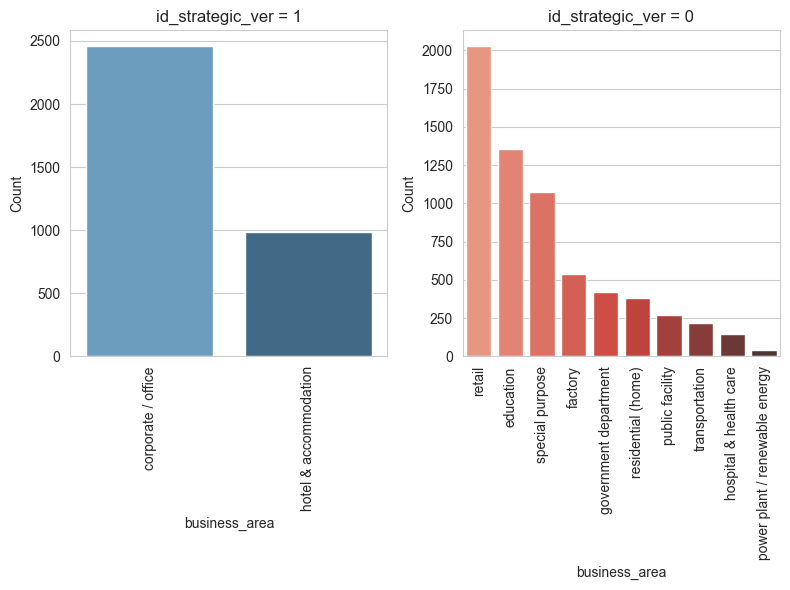

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['business_unit'] == 'ID']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_id_strategic_1 = df_train_id[df_train_id['id_strategic_ver'] == 1]
df_train_id_strategic_0 = df_train_id[df_train_id['id_strategic_ver'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_area'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


특정 사업 영역(Vertical Level1) -> business_area(고객의 사업 영역) 와 관련이 있음을 그래프를 통해 확인할수 있음

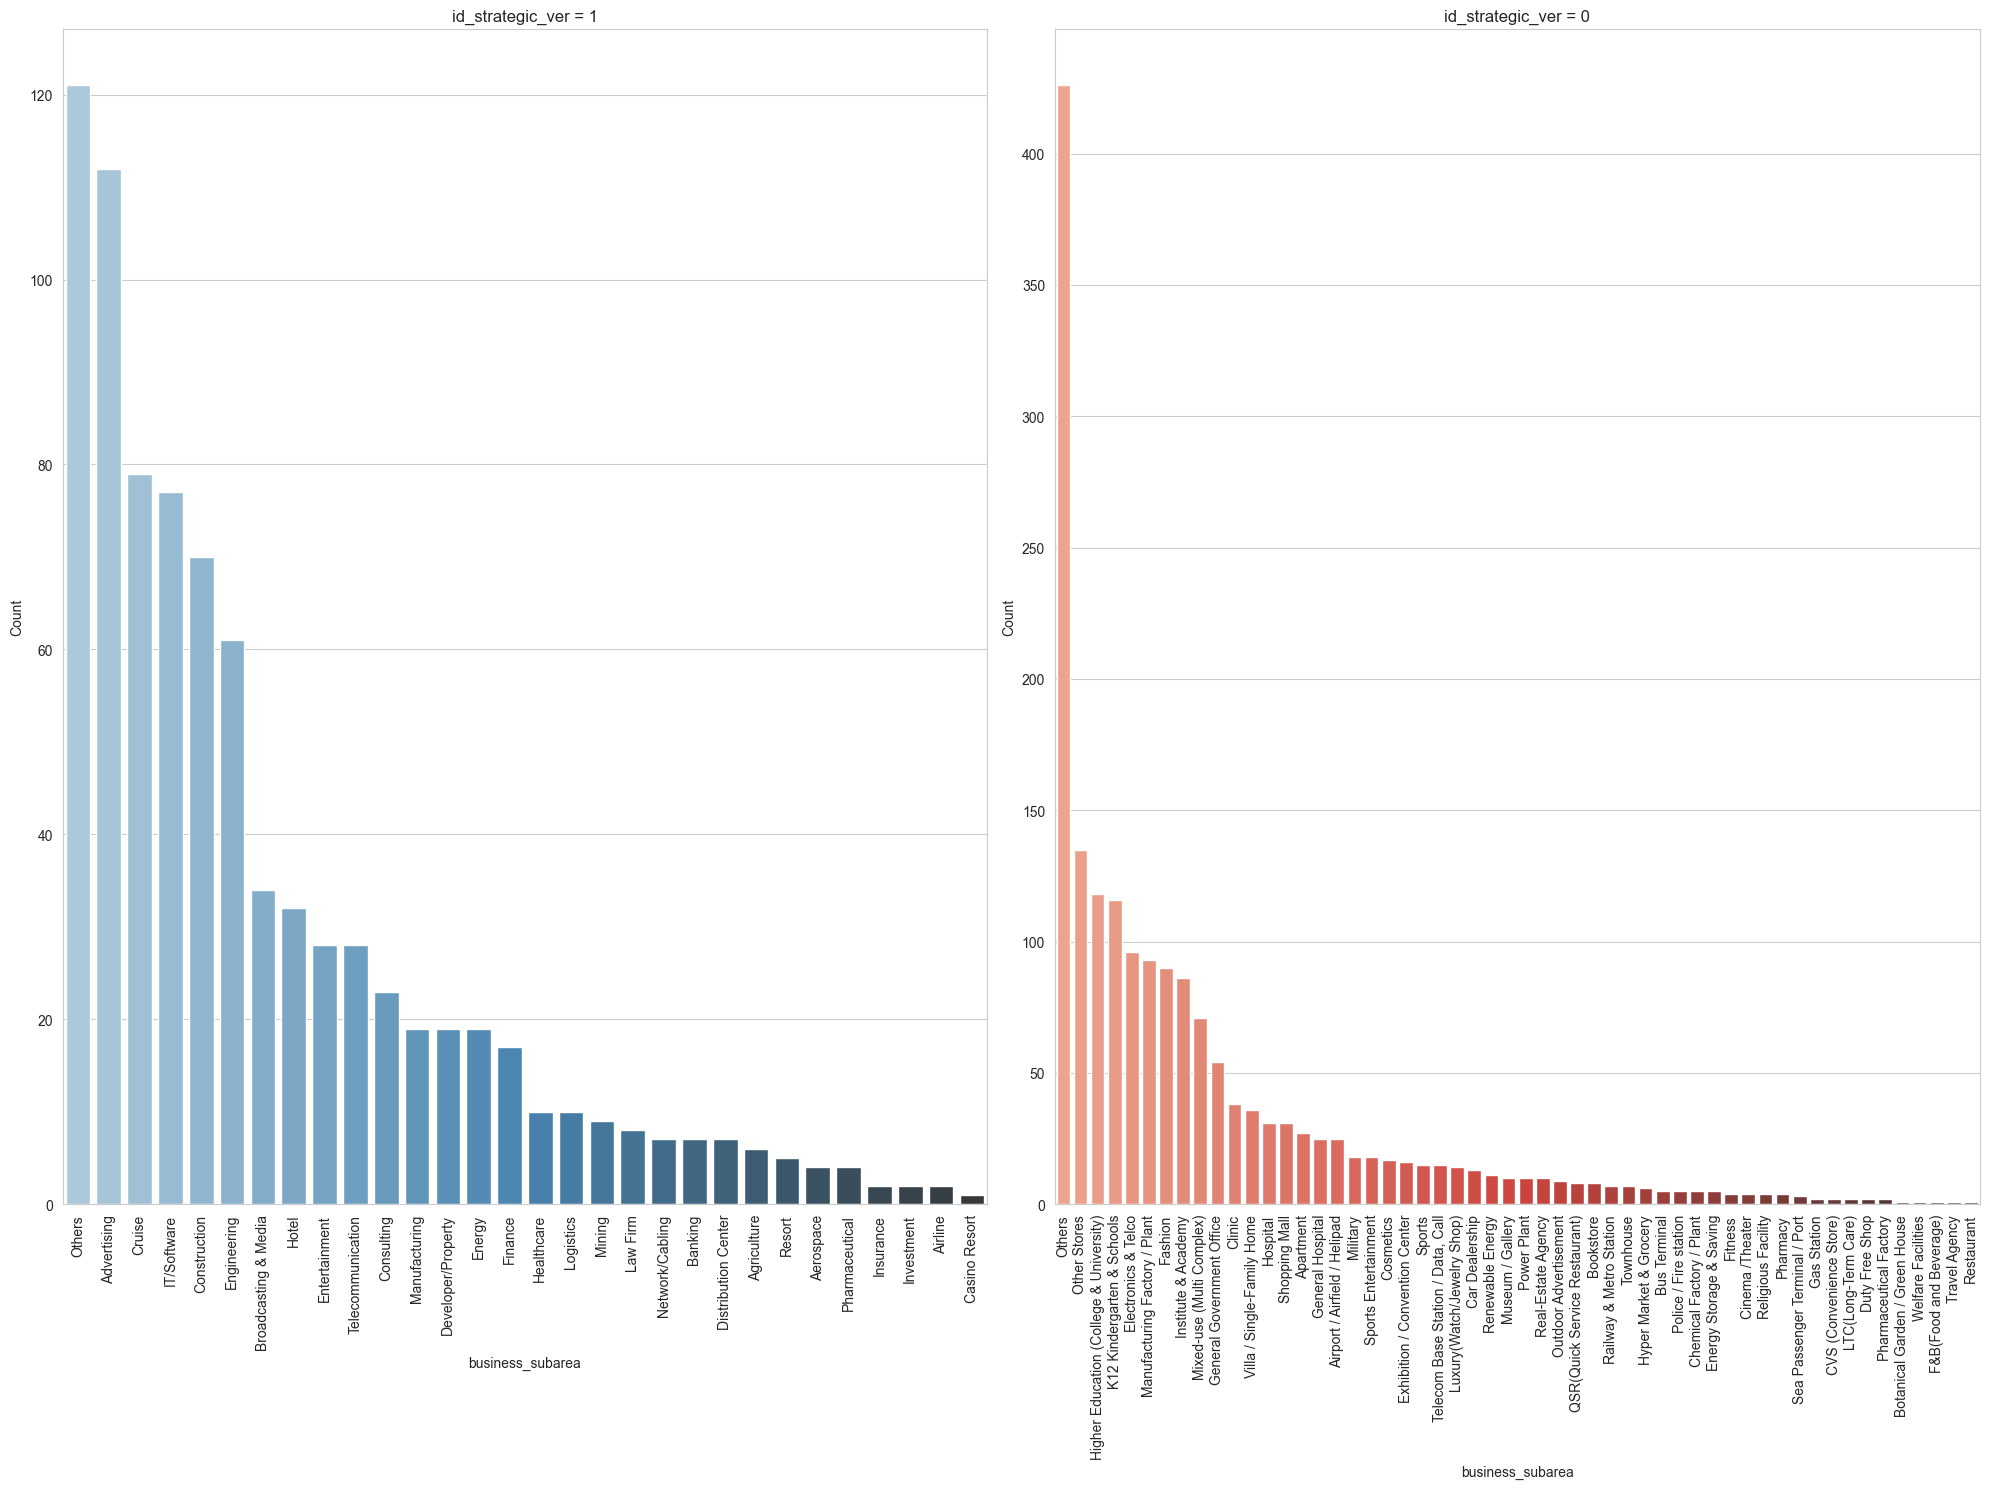

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_subarea'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_subarea'].value_counts()

# 그래프
plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_subarea')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_subarea')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [38]:
# count_id_strategic_0 와 count_id_strategic_1 사이의 차이를 계산
difference = count_id_strategic_0.subtract(count_id_strategic_1, fill_value=0)

# 차이를 출력
print(difference)

business_subarea
Advertising                    -112.0
Aerospace                        -4.0
Agriculture                      -6.0
Airline                          -2.0
Airport / Airfield / Helipad     25.0
                                ...  
Telecommunication               -28.0
Townhouse                         7.0
Travel Agency                     1.0
Villa / Single-Family Home       36.0
Welfare Facilities                1.0
Name: count, Length: 83, dtype: float64


business_subarea (고객의 세부 사업 영역) 부분에서는 유의미한 차이가 보이지않음

id_strategic_ver 는 결국 business_unit이 'ID'이면서,  
business_area가 'corporate / office' 또는 'hotel & accommodation'인 값에 대해서  
가중치를 주는 변수임을 확인가능

#### 10. it_strategic_ver

(도메인 지식)   
특정 사업부(Business Unit),  
특정 사업 영역(Vertical Level1)에 대해  
가중치를 부여

business_unit 에서 It 사업부에 대한 변수

In [39]:
df_train['it_strategic_ver'].value_counts()

it_strategic_ver
1.0    1121
Name: count, dtype: int64

In [40]:
# 누락된 값을 0으로 채우기
df_train['it_strategic_ver'].fillna(0, inplace=True)
df_test['it_strategic_ver'].fillna(0, inplace=True)

In [41]:
df_train['it_strategic_ver'].value_counts()

it_strategic_ver
0.0    58178
1.0     1121
Name: count, dtype: int64

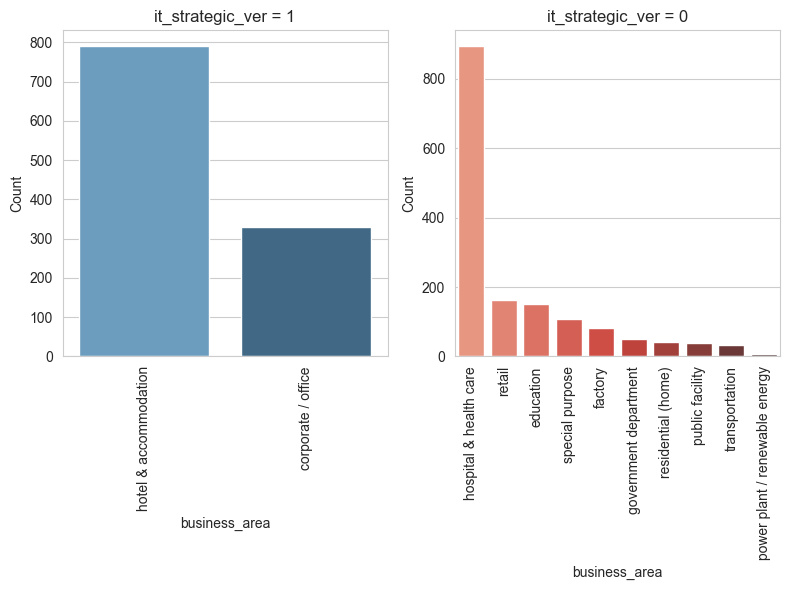

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['business_unit'] == 'IT']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_id_strategic_1 = df_train_id[df_train_id['it_strategic_ver'] == 1]
df_train_id_strategic_0 = df_train_id[df_train_id['it_strategic_ver'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_area'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('it_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('it_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


it_strategic_ver 는 business_unit이 'It'이면서,  
고객의 사업영역은 ID 사업부에서의 가중치와 동일하게  
business_area가 'corporate / office' 또는 'hotel & accommodation'인 값에 대해서  
가중치를 주는 변수임을 확인가능

#### 11. idit_strategic_ver

Id_strategic_ver이나 it_strategic_ver 값 중   
하나라도 1의 값을 가지면 1 값으로 표현

In [43]:
df_train['idit_strategic_ver'].value_counts()

idit_strategic_ver
1.0    4565
Name: count, dtype: int64

In [44]:
# 누락된 값을 0으로 채우기
df_train['idit_strategic_ver'].fillna(0, inplace=True)
df_test['idit_strategic_ver'].fillna(0, inplace=True)

In [45]:
df_train['idit_strategic_ver'].value_counts()

idit_strategic_ver
0.0    54734
1.0     4565
Name: count, dtype: int64

#### 12. customer_job

고객의 직업군

In [46]:
df_train['customer_job'].value_counts()

customer_job
engineering                       6342
other                             4852
administrative                    3359
education                         2287
sales                             2218
                                  ... 
appliance specialist                 1
av estimator                         1
purchasers                           1
pricing                              1
exhibition / convention center       1
Name: count, Length: 560, dtype: int64

#### 13. lead_desc_length

고객이 작성한 Lead Descriptoin 텍스트 총 길이

In [47]:
df_train['lead_desc_length'].value_counts()

lead_desc_length
3      10378
14      3180
2        934
10       891
4        884
       ...  
824        1
559        1
676        1
907        1
726        1
Name: count, Length: 909, dtype: int64

#### 14. inquiry_type

고객의 문의 유형

In [48]:
# 출력 옵션을 설정
pd.set_option('display.max_rows', None)

In [49]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
Usage or technical consultation                                                                                          668
Trainings                                                                                                                434
Technical Consultation                                                                                          

In [50]:
# 'inquiry_type' 열의 철자오류에 대해 일관된 값으로 변환
## Ctrl + Shift + [ : 현재 영역 접기
df_train['inquiry_type'] = df_train['inquiry_type'].replace({

    'Quotation or purchase consultation': 'Quotation or Purchase Consultation',
    'Request for quotation or purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'Purchase or Quotation': 'Quotation or Purchase Consultation',
    'Quotation or Purchase consultation': 'Quotation or Purchase Consultation',
    'Purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',

    'Usage or technical consultation': 'Usage or Technical Consultation',
    'Technical Consultation': 'Usage or Technical Consultation',
    'usage or technical consultation': 'Usage or Technical Consultation',
    'usage_or_technical_consultation': 'Usage or Technical Consultation',
    'Request for technical consulting': 'Usage or Technical Consultation',
    'technical_consultation': 'Usage or Technical Consultation',
    'technical': 'Usage or Technical Consultation',

    'sales':'Sales Inquiry',
    'Sales inquiry':'Sales Inquiry',

    'other': 'Other',
    'other_': 'Other',
    'others': 'Other',
    'Others' : 'Other',
    'Etc.': 'Other',

})

df_test['inquiry_type'] = df_test['inquiry_type'].replace({

    'Quotation or purchase consultation': 'Quotation or Purchase Consultation',
    'Request for quotation or purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'Purchase or Quotation': 'Quotation or Purchase Consultation',
    'Quotation or Purchase consultation': 'Quotation or Purchase Consultation',
    'Purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',

    'Usage or technical consultation': 'Usage or Technical Consultation',
    'Technical Consultation': 'Usage or Technical Consultation',
    'usage or technical consultation': 'Usage or Technical Consultation',
    'usage_or_technical_consultation': 'Usage or Technical Consultation',
    'Request for technical consulting': 'Usage or Technical Consultation',
    'technical_consultation': 'Usage or Technical Consultation',
    'technical': 'Usage or Technical Consultation',

    'sales':'Sales Inquiry',
    'Sales inquiry':'Sales Inquiry',

    'other': 'Other',
    'other_': 'Other',
    'others': 'Other',
    'Others' : 'Other',
    'Etc.': 'Other',
    
})


In [51]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation                                                                                     42384
Sales Inquiry                                                                                                          10081
Usage or Technical Consultation                                                                                         1668
Other                                                                                                                   1243
Product Information                                                                                                     1237
Trainings                                                                                                                434
Services                                                                                                                 415
Request for Partnership                                                                                         

In [52]:
# 'inquiry_type' 열의 값별 개수를 계산합니다.
value_counts = df_train['inquiry_type'].value_counts()

# 10개 이하인 값들의 리스트를 만듭니다.
to_replace = value_counts[value_counts <= 10].index

# 10개 이하인 값들을 'Other'로 업데이트합니다.
df_train['inquiry_type'] = df_train['inquiry_type'].replace(to_replace, 'Other')


In [53]:
# 'inquiry_type' 열의 값별 개수를 계산합니다.
value_counts = df_test['inquiry_type'].value_counts()

# 10개 이하인 값들의 리스트를 만듭니다.
to_replace = value_counts[value_counts <= 10].index

# 10개 이하인 값들을 'Other'로 업데이트합니다.
df_test['inquiry_type'] = df_test['inquiry_type'].replace(to_replace, 'Other')


In [54]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    42384
Sales Inquiry                         10081
Usage or Technical Consultation        1668
Other                                  1303
Product Information                    1237
Trainings                               434
Services                                415
Request for Partnership                 297
Request a Demo                          184
ETC.                                    158
Technical Support                       110
Request for Distributorship              75
Customer Suggestions                     12
Name: count, dtype: int64

In [55]:
df_test['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    3465
Usage or Technical Consultation        187
Other                                  141
Product Information                     68
Request for Partnership                 63
Services                                34
Trainings                               21
Name: count, dtype: int64

#### 15. product_category

요청 제품 카테고리

In [56]:
df_train['product_category'].value_counts()

product_category
interactive digital board                                                                               6154
vrf                                                                                                     5640
multi-split                                                                                             3674
video wall signage                                                                                      2029
etc.                                                                                                    2018
led signage                                                                                             1895
interactive signage                                                                                     1862
single-split                                                                                            1569
rac                                                                                                     1447
ol

In [57]:
df_train['product_category'] = df_train['product_category'].replace({
    'rac': 'Air Conditioner',
    'vrf,chiller': 'Air Conditioner',
    'single package': 'Air Conditioner',
    'scroll compressor': 'Others',
    'pantalla led outdoor': 'Digital Signage',
    'not specified': 'Others',
    'etc.': 'Others',
    'vrf,multi-split,etc.': 'Air Conditioner',
    'vrf,multi-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'solar,robot': 'Solar',
    'rac single cac': 'Air Conditioner',
    'teto ou cassete inverter': 'Air Conditioner',
    'multi inverter': 'Air Conditioner',
    '28mq780': 'TV and Display',
    '32 pol': 'TV and Display',
    'tv 43 pol': 'TV and Display',
    '43 pol': 'TV and Display',
    'commercial tv,solar,ess,monior/monitor tv,pc,p...': 'TV and Display',
    'tv,refrigerator': 'TV and Display',
    'a definir': 'Others',
    'điều hòa trung tâm chiller': 'Air Conditioner',
    'điều hòa cục bộ': 'Air Conditioner',
    'tv 55"': 'TV and Display',
    'surgical monitor': 'Medical Display',
    'gsca046': 'Others',
    'gscd100': 'Others',
    'procentric': 'Others',
    'tv signage': 'TV and Display',
    'collaboration displays': 'Digital Signage',
    'id': 'Others',
    'meeting & screen sharedirect view leddirect vi...': 'Digital Signage',
    'window facing display': 'Digital Signage',
    'lg customer care program': 'Others',
    'led': 'TV and Display',
    'lainnya': 'Others',
    'control': 'Others',
    'pendingin': 'Others',
    'ar condicionado residencial': 'Air Conditioner',
    'multi v5 vrf': 'Air Conditioner',
    'split tunggal': 'Air Conditioner',
    'multi v': 'Air Conditioner',
    'ac rumah': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'אחר': 'Others',
    'vrf,multi-split': 'Air Conditioner',
    'vrf,multi-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,heating': 'Air Conditioner',
    'error': 'Others',
    'others': 'Others',
    'computer monitors': 'TV and Display',
    'monitor & pc': 'Digital Signage',
    'medical monitors': 'Medical Display',
    'system air conditioner': 'Air Conditioner',
    'solar,ess,ems': 'Solar',
    'tv,mobile': 'TV and Display',
    'commercial tv,projector': 'TV and Display',
    'aircare,water care': 'Heating and Ventilation',
    'monior/monitor tv,chiller': 'TV and Display',
    'system ac,chiller': 'Heating and Ventilation',
    'system ac,aircare': 'Heating and Ventilation',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'system ac,tv': 'Air Conditioner',
    'solar': 'Solar',
    'monior/monitor tv,pc': 'TV and Display',
    'monitor signage,pc': 'Digital Signage',
    'solar,monior/monitor tv': 'Solar',
    'solar,projector': 'Solar',
    'commercial tv,robot': 'TV and Display',
    'energy storage system': 'Energy Storage',
    'tv,audio/video': 'TV and Display',
    'monitor signage,audio/video': 'Digital Signage',
    'monitor signage,commercial tv,monior/monitor tv,projector,tv': 'Digital Signage',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc': 'Solar',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'monitor signage,commercial tv,monior/monitor tv,tv': 'Digital Signage',
    'monitor signage,monior/monitor tv,tv,audio/video': 'Digital Signage',
    'pc,tv': 'TV and Display',
    'sac': 'Air Conditioner',
    'monitor signage,solar': 'Solar',
    'solar,refrigerator': 'Solar',
    'monitor signage,system ac': 'Digital Signage',
    'system air conditioner,solar': 'Solar',
    'solar,tv': 'Solar',
    'monitor signage,tv': 'TV and Display',
    'dryer,chiller': 'Heating and Ventilation',
    'videwall': 'Digital Signage',
    'ultra stretch signage': 'Digital Signage',
    'solar,vacuum cleaner': 'Solar',
    'monitor signage,solar,robot,water care': 'Solar',
    'mobile,audio/video': 'Others',
    'system ac,refrigerator,washing machine,dryer': 'Heating and Ventilation',
    'solar,system ac,aircare': 'Solar',
    'projector,system ac,water care': 'TV and Display',
    'chiller,water care': 'Heating and Ventilation',
    'ess,chiller': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv,pc,tv': 'Digital Signage',
    'solar,water care': 'Solar',
    'digital signage or commercial tvs': 'Digital Signage',
    'education createboard': 'Digital Signage',
    'virtual production': 'Others',
    'laec015': 'Others',
    'monitor signage,commercial tv,audio/video': 'Digital Signage',
    'solar,built-in/cooking': 'Solar',
    'monitor signage,monior/monitor tv,commercial tv': 'Digital Signage',
    'commercial tv,monior/monitor tv': 'TV and Display',
    'robot,system ac': 'Others',
    '55us660h0sd.bwz': 'Others',
    'transparent oled': 'Digital Signage',
    'medical- surgical': 'Medical Display',
    'radiology displays': 'Medical Display',
    'high inch 86 / 98 or 110': 'TV and Display',
    'leadallin': 'Others',
    'ฯลฯ': 'Others',
    'commercial tv,water care': 'TV and Display',
    'pc,washing machine': 'Others',
    'system air conditioner,energy storage system': 'Air Conditioner',
    'tv,commercial tv': 'TV and Display',
    'system ac,home beauty': 'Heating and Ventilation',
    'information display,monitor': 'Digital Signage',
    'taa lcd lfd displays': 'Digital Signage',
    'rac/cac': 'Air Conditioner',
    'حلول التدفئة': 'Heating and Ventilation',
    'system ac,chiller,aircare': 'Heating and Ventilation',
    'otros': 'Others',
    'tv,refrigerator,washing machine': 'TV and Display',
    'monior/monitor tv,refrigerator': 'TV and Display',
    'projector,audio/video': 'TV and Display',
    'monior/monitor tv,audio/video': 'TV and Display',
    'refrigerator,washing machine,built-in/cooking': 'Heating and Ventilation',
    'system ac': 'Heating and Ventilation',
    'laec015-gn.awz': 'Others',
    'gscd046': 'Others',
    '32lq621cbsb.awz': 'TV and Display',
    '43uh5f-h.awzm': 'TV and Display',
    '49vl5g-m.awzm': 'TV and Display',
    '55uq801c0sb.bwz': 'TV and Display',
    '43uq751c0sf.bwz': 'TV and Display',
    '32 / 43 pol': 'TV and Display',
    'htv': 'TV and Display',
    '43uq751c0sb.bwz': 'TV and Display',
    '49uh / 49xf': 'TV and Display',
    '50us660h0sd.bwz': 'TV and Display',
    'tv 60"': 'TV and Display',
    'medical monitor': 'Medical Display',
    'aircare,mobile': 'Others',
    'solar,ess,system ac': 'Solar',
    'system ac,refrigerator': 'Heating and Ventilation',
    'tv,pc': 'TV and Display',
    'chiller,refrigerator': 'Heating and Ventilation',
    'commercial tv,solar': 'Solar',
    'monior/monitor tv,projector,audio/video': 'TV and Display',
    'unitario': 'Others',
    'refrigerator,chiller': 'Heating and Ventilation',
    'chiller,tv': 'Heating and Ventilation',
    'projector,ems': 'TV and Display',
    'monitor signage,mobile': 'Digital Signage',
    'robot,vacuum cleaner': 'Others',
    'điều hòa trung tâm multi': 'Air Conditioner',
    'ogrzewanie (pompy ciepła)': 'Heating and Ventilation',
    'soğutucu': 'Others',
    'điều hòa gia dụng': 'Air Conditioner',
    'نظام التدفق المتغيرvrf': 'Air Conditioner',
    'chiller/enfriadoras': 'Heating and Ventilation',
    '49vl5g-m': 'TV and Display',
    'lg led bloc': 'TV and Display',
    'uh': 'Others',
    '55vm5e-a': 'TV and Display',
    'laec15': 'Others',
    '55vm5j-h': 'TV and Display',
    '49vl5f': 'TV and Display',
    'standalone': 'Others',
    'corpouh5f': 'Others',
    'ledallinone': 'TV and Display',
    'monitorindustrial_rmk': 'Digital Signage',
    'lg magnit': 'TV and Display',
    '特別顯示屏': 'Digital Signage',
    'signage': 'Digital Signage',
    'videowall_rmk': 'Digital Signage',
    'bu50nst': 'TV and Display',
    'led 70m2': 'TV and Display',
    'led cinema': 'TV and Display',
    '86uh5f': 'TV and Display',
    '55tc3d': 'TV and Display',
    '43us660h (na)': 'TV and Display',
    'pro centric hotel': 'Digital Signage',
    'video wall + aio': 'Digital Signage',
    'hospitality': 'Others',
    'one:quick': 'Others',
    '高亮度顯示屏': 'Digital Signage',
    'comercial tv': 'TV and Display',
    'corpuh5f-': 'Others',
    'allinone_rmk': 'TV and Display',
    'hoteleria_us670h': 'Others',
    'retaildigital': 'Digital Signage',
    '軟體': 'Others',
    '醫院電視': 'Others',
    'ctv': 'TV and Display',
    'calefacción': 'Heating and Ventilation',
    'autre': 'Others',
    'vb.': 'Others',
    'ac rumah': 'Air Conditioner',
    'เครื่องปรับอากาศเผื่อที่อยู่อาศัย': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'vrf - multi v s': 'Air Conditioner',
    'systèmes de débit à réfrigérant variable (drv)': 'Air Conditioner',
    'climatiseur résidentiel': 'Air Conditioner',
    'multi-split (plusieurs pièces)': 'Air Conditioner',
    'aquecimento': 'Heating and Ventilation',
    'khác': 'Others',
    'lg salang air solution for dream homes': 'Others',
    'services': 'Others',
    'آخر': 'Others',
    'vrf,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,etc.': 'Air Conditioner',
    'multi-split,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split': 'Air Conditioner',
    'on or several reversible ac': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'video wall signage': 'Digital Signage',
    'led signage': 'Digital Signage',
    'interactive signage': 'Digital Signage',
    'single-split': 'Air Conditioner',
    'oled signage': 'Digital Signage',
    'hotel tv': 'TV and Display',
    'chiller': 'Heating and Ventilation',
    'standard signage': 'Digital Signage',
    'medical display': 'Medical Display',
    'lg one:quick series': 'TV and Display',
    'monitor': 'TV and Display',
    'one:quick series': 'TV and Display',
    'heating': 'Heating and Ventilation',
    'high brightness signage': 'Digital Signage',
    'ventilation': 'Heating and Ventilation',
    'high brightness': 'Others',
    'software solution': 'Others',
    'accessories': 'Others',
    'special signage': 'Digital Signage',
    'all lg vrf systems': 'Air Conditioner',
    'commercial display': 'TV and Display',
    'residential air conditioner': 'Air Conditioner',
    'ur640s': 'TV and Display',
    'outros': 'Others',
    'signage care solution': 'Digital Signage',
    'multi v 5 air': 'Air Conditioner',
    'smart tv signage': 'TV and Display',
    'technical support': 'Others',
    'projector': 'TV and Display',
    'ur640': 'TV and Display',
    'cloud device': 'Others',
    'medical displays': 'Medical Display',
    'laptop': 'Others',
    'a thermodynamic water heater': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv': 'Digital Signage',
    'uhd signage': 'Digital Signage',
    'idb': 'Others',
    'commercial tv': 'TV and Display',
    '43us660h0sd.awz': 'TV and Display',
    'digital signage': 'Digital Signage',
    'solar,ess': 'Solar',
    'commercial tv,tv': 'TV and Display',
    'onequick series': 'TV and Display',
    'led 顯示屏': 'Digital Signage',
    'monior/monitor tv,tv': 'TV and Display',
    'multi v water 5': 'Air Conditioner',
    'other': 'Others',
    'tv': 'TV and Display',
    'isıtma': 'Heating and Ventilation',
    'solar,system ac': 'Solar',
    'lg one:quick': 'TV and Display',
    'fhd series': 'TV and Display',
    'sales inquiry': 'Others',
    'washing machine,dryer': 'Others',
    'solar,aircare': 'Solar',
    'interactive digital board': 'Digital Signage',  
    'vrf': 'Air Conditioner',  
    'multi-split': 'Air Conditioner',  
    'hospital tv': 'TV and Display',
    'webos': 'Others',
    'pc': 'Others',
    'pro:centric': 'Digital Signage',
    'video wall': 'Digital Signage',
    '互動式顯示屏': 'Digital Signage',
    'تكييف وتبريد': 'Heating and Ventilation',
    'chiller,aircare': 'Heating and Ventilation',  
    'oled 顯示屏': 'Digital Signage',
    'robots': 'Others',
    'solar,chiller': 'Solar', 
    '標準顯示屏': 'Digital Signage',
    'מזגנים למקום מגורים': 'Air Conditioner',  
    'single split': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv': 'Digital Signage',
    'مبرد (تشيلر)': 'Heating and Ventilation',
    'commercial tv,audio/video': 'TV and Display',
    'تكييفات': 'Air Conditioner',
    'standard': 'Others',
    'חימום': 'Heating and Ventilation',
    'kimatyzacja vrf': 'Air Conditioner',
    'lg home bliss air solution': 'Others',
    'multi split': 'Air Conditioner',
    'ahu': 'Heating and Ventilation',
    '酒店電視': 'TV and Display',
    'aio': 'Others',
    'one quick:flex': 'TV and Display',
    '50uq801c0sb.bwz': 'TV and Display',
    'ultra stretch series': 'TV and Display',
    'klimatyzacja multi-split': 'Air Conditioner',
    'Heating': 'Heating and Ventilation',
    'system ac,rac': 'Air Conditioner',
    'Energy Storage': 'Energy Storage',
    'signage care solutions': 'Digital Signage',
    'commercial tv,solar,ess,projector,system ac,tv,washing machine,home beauty,audio/video': 'Digital Signage',
    'inne': 'Others',
    'monitor signage,commercial tv,monior/monitor tv,audio/video': 'Digital Signage',
    'single cac': 'Air Conditioner',
    'solar,energy storage system': 'Solar',
    'system ac,solar': 'Solar',
    'solar,system ac,water care': 'Solar',
    '55svh7f-a': 'TV and Display',
    'tr3': 'Others',
    '98uh5e': 'TV and Display',
    'monitor signage,commercial tv,monior/monitor tv,pc,projector,tv,audio/video': 'Digital Signage',
    'monitor signage,monior/monitor tv,vacuum cleaner,tv,home beauty,commercial tv,pc,refrigerator,styler': 'Digital Signage',
    'điều hòa trung tâm vrf': 'Air Conditioner',
    'cac': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv,pc,tv,home beauty,audio/video': 'Digital Signage',
    'pc,robot,system ac,chiller,tv,refrigerator,washing machine,vacuum cleaner,styler,dryer,mobile,audio/': 'Digital Signage',
    'tv,refrigerator,washing machine,vacuum cleaner,audio/video': 'TV and Display',
    'refrigerator,built-in/cooking': 'Others',
    'vrf,heating': 'Air Conditioner',
    'ems,audio/video': 'Others',
    'projector,ems,mobile,audio/video': 'Digital Signage',
    'smart tv': 'TV and Display',
    'lsca039': 'Others',
    'essential series': 'Others',
    'system ac,tv,refrigerator,washing machine,built-in/cooking,audio/video': 'Others',
    'solar,monior/monitor tv,pc,tv,refrigerator,washing machine,dryer,home beauty': 'Others',
    'monitor signage,monior/monitor tv,system ac,vacuum cleaner,tv,home beauty,commercial tv,mobile,audio': 'Digital Signage',
    'chiller,dryer': 'Heating and Ventilation',
    'solar,dryer': 'Solar',
    'refrigerator': 'Others',
    'parts': 'Others',
    'monior/monitor tv,system ac,tv,refrigerator,washing machine,dryer,built-in/cooking': 'Others',
    'lg paradise air solution': 'Others',
    'פיצול מרובה': 'Others',
    'meeting & screen sharedirect view leddirect view led': 'Digital Signage',
    'one:quick flex': 'TV and Display',
    'videowall signage': 'Digital Signage',
    '110 + video wall': 'Digital Signage',
    'aio | one quick': 'Others',
    'aircare,built-in/cooking': 'Heating and Ventilation',
    'one quick works': 'Others',
    'led aio 136': 'TV and Display',
    'monior/monitor tv,refrigerator,audio/video': 'Digital Signage',
    'monitor signage,commercial tv': 'Others',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chill': 'Others',
    'monior/monitor tv,system ac,tv,pc,refrigerator,water care,solar,washing machine,mobile,chiller,built': 'Others',
    'monitor signage,commercial tv,solar,projector,robot,chiller,refrigerator,built-in/cooking,water care': 'Others',
    'monitor signage,commercial tv,solar,pc,projector,system ac,ems,rac,chiller,refrigerator,washing mach': 'Others',
    'system ac,solar,washing machine': 'Others',
    'monitor signage,solar,monior/monitor tv,pc,projector,robot,system ac,tv,refrigerator,washing machine': 'Others',
    'monior/monitor tv,tv,commercial tv,pc,refrigerator,solar,rac,washing machine,mobile,ess,audio/video': 'Others',
    'commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chiller,refrigerator,': 'Others',
})
df_test['product_category'] = df_test['product_category'].replace({
    'rac': 'Air Conditioner',
    'vrf,chiller': 'Air Conditioner',
    'single package': 'Air Conditioner',
    'scroll compressor': 'Others',
    'pantalla led outdoor': 'Digital Signage',
    'not specified': 'Others',
    'etc.': 'Others',
    'vrf,multi-split,etc.': 'Air Conditioner',
    'vrf,multi-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'solar,robot': 'Solar',
    'rac single cac': 'Air Conditioner',
    'teto ou cassete inverter': 'Air Conditioner',
    'multi inverter': 'Air Conditioner',
    '28mq780': 'TV and Display',
    '32 pol': 'TV and Display',
    'tv 43 pol': 'TV and Display',
    '43 pol': 'TV and Display',
    'commercial tv,solar,ess,monior/monitor tv,pc,p...': 'TV and Display',
    'tv,refrigerator': 'TV and Display',
    'a definir': 'Others',
    'điều hòa trung tâm chiller': 'Air Conditioner',
    'điều hòa cục bộ': 'Air Conditioner',
    'tv 55"': 'TV and Display',
    'surgical monitor': 'Medical Display',
    'gsca046': 'Others',
    'gscd100': 'Others',
    'procentric': 'Others',
    'tv signage': 'TV and Display',
    'collaboration displays': 'Digital Signage',
    'id': 'Others',
    'meeting & screen sharedirect view leddirect vi...': 'Digital Signage',
    'window facing display': 'Digital Signage',
    'lg customer care program': 'Others',
    'led': 'TV and Display',
    'lainnya': 'Others',
    'control': 'Others',
    'pendingin': 'Others',
    'ar condicionado residencial': 'Air Conditioner',
    'multi v5 vrf': 'Air Conditioner',
    'split tunggal': 'Air Conditioner',
    'multi v': 'Air Conditioner',
    'ac rumah': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'אחר': 'Others',
    'vrf,multi-split': 'Air Conditioner',
    'vrf,multi-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,heating': 'Air Conditioner',
    'error': 'Others',
    'others': 'Others',
    'computer monitors': 'TV and Display',
    'monitor & pc': 'Digital Signage',
    'medical monitors': 'Medical Display',
    'system air conditioner': 'Air Conditioner',
    'solar,ess,ems': 'Solar',
    'tv,mobile': 'TV and Display',
    'commercial tv,projector': 'TV and Display',
    'aircare,water care': 'Heating and Ventilation',
    'monior/monitor tv,chiller': 'TV and Display',
    'system ac,chiller': 'Heating and Ventilation',
    'system ac,aircare': 'Heating and Ventilation',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'system ac,tv': 'Air Conditioner',
    'solar': 'Solar',
    'monior/monitor tv,pc': 'TV and Display',
    'monitor signage,pc': 'Digital Signage',
    'solar,monior/monitor tv': 'Solar',
    'solar,projector': 'Solar',
    'commercial tv,robot': 'TV and Display',
    'energy storage system': 'Energy Storage',
    'tv,audio/video': 'TV and Display',
    'monitor signage,audio/video': 'Digital Signage',
    'monitor signage,commercial tv,monior/monitor tv,projector,tv': 'Digital Signage',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc': 'Solar',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'monitor signage,commercial tv,monior/monitor tv,tv': 'Digital Signage',
    'monitor signage,monior/monitor tv,tv,audio/video': 'Digital Signage',
    'pc,tv': 'TV and Display',
    'sac': 'Air Conditioner',
    'monitor signage,solar': 'Solar',
    'solar,refrigerator': 'Solar',
    'monitor signage,system ac': 'Digital Signage',
    'system air conditioner,solar': 'Solar',
    'solar,tv': 'Solar',
    'monitor signage,tv': 'TV and Display',
    'dryer,chiller': 'Heating and Ventilation',
    'videwall': 'Digital Signage',
    'ultra stretch signage': 'Digital Signage',
    'solar,vacuum cleaner': 'Solar',
    'monitor signage,solar,robot,water care': 'Solar',
    'mobile,audio/video': 'Others',
    'system ac,refrigerator,washing machine,dryer': 'Heating and Ventilation',
    'solar,system ac,aircare': 'Solar',
    'projector,system ac,water care': 'TV and Display',
    'chiller,water care': 'Heating and Ventilation',
    'ess,chiller': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv,pc,tv': 'Digital Signage',
    'solar,water care': 'Solar',
    'digital signage or commercial tvs': 'Digital Signage',
    'education createboard': 'Digital Signage',
    'virtual production': 'Others',
    'laec015': 'Others',
    'monitor signage,commercial tv,audio/video': 'Digital Signage',
    'solar,built-in/cooking': 'Solar',
    'monitor signage,monior/monitor tv,commercial tv': 'Digital Signage',
    'commercial tv,monior/monitor tv': 'TV and Display',
    'robot,system ac': 'Others',
    '55us660h0sd.bwz': 'Others',
    'transparent oled': 'Digital Signage',
    'medical- surgical': 'Medical Display',
    'radiology displays': 'Medical Display',
    'high inch 86 / 98 or 110': 'TV and Display',
    'leadallin': 'Others',
    'ฯลฯ': 'Others',
    'commercial tv,water care': 'TV and Display',
    'pc,washing machine': 'Others',
    'system air conditioner,energy storage system': 'Air Conditioner',
    'tv,commercial tv': 'TV and Display',
    'system ac,home beauty': 'Heating and Ventilation',
    'information display,monitor': 'Digital Signage',
    'taa lcd lfd displays': 'Digital Signage',
    'rac/cac': 'Air Conditioner',
    'حلول التدفئة': 'Heating and Ventilation',
    'system ac,chiller,aircare': 'Heating and Ventilation',
    'otros': 'Others',
    'tv,refrigerator,washing machine': 'TV and Display',
    'monior/monitor tv,refrigerator': 'TV and Display',
    'projector,audio/video': 'TV and Display',
    'monior/monitor tv,audio/video': 'TV and Display',
    'refrigerator,washing machine,built-in/cooking': 'Heating and Ventilation',
    'system ac': 'Heating and Ventilation',
    'laec015-gn.awz': 'Others',
    'gscd046': 'Others',
    '32lq621cbsb.awz': 'TV and Display',
    '43uh5f-h.awzm': 'TV and Display',
    '49vl5g-m.awzm': 'TV and Display',
    '55uq801c0sb.bwz': 'TV and Display',
    '43uq751c0sf.bwz': 'TV and Display',
    '32 / 43 pol': 'TV and Display',
    'htv': 'TV and Display',
    '43uq751c0sb.bwz': 'TV and Display',
    '49uh / 49xf': 'TV and Display',
    '50us660h0sd.bwz': 'TV and Display',
    'tv 60"': 'TV and Display',
    'medical monitor': 'Medical Display',
    'aircare,mobile': 'Others',
    'solar,ess,system ac': 'Solar',
    'system ac,refrigerator': 'Heating and Ventilation',
    'tv,pc': 'TV and Display',
    'chiller,refrigerator': 'Heating and Ventilation',
    'commercial tv,solar': 'Solar',
    'monior/monitor tv,projector,audio/video': 'TV and Display',
    'unitario': 'Others',
    'refrigerator,chiller': 'Heating and Ventilation',
    'chiller,tv': 'Heating and Ventilation',
    'projector,ems': 'TV and Display',
    'monitor signage,mobile': 'Digital Signage',
    'robot,vacuum cleaner': 'Others',
    'điều hòa trung tâm multi': 'Air Conditioner',
    'ogrzewanie (pompy ciepła)': 'Heating and Ventilation',
    'soğutucu': 'Others',
    'điều hòa gia dụng': 'Air Conditioner',
    'نظام التدفق المتغيرvrf': 'Air Conditioner',
    'chiller/enfriadoras': 'Heating and Ventilation',
    '49vl5g-m': 'TV and Display',
    'lg led bloc': 'TV and Display',
    'uh': 'Others',
    '55vm5e-a': 'TV and Display',
    'laec15': 'Others',
    '55vm5j-h': 'TV and Display',
    '49vl5f': 'TV and Display',
    'standalone': 'Others',
    'corpouh5f': 'Others',
    'ledallinone': 'TV and Display',
    'monitorindustrial_rmk': 'Digital Signage',
    'lg magnit': 'TV and Display',
    '特別顯示屏': 'Digital Signage',
    'signage': 'Digital Signage',
    'videowall_rmk': 'Digital Signage',
    'bu50nst': 'TV and Display',
    'led 70m2': 'TV and Display',
    'led cinema': 'TV and Display',
    '86uh5f': 'TV and Display',
    '55tc3d': 'TV and Display',
    '43us660h (na)': 'TV and Display',
    'pro centric hotel': 'Digital Signage',
    'video wall + aio': 'Digital Signage',
    'hospitality': 'Others',
    'one:quick': 'Others',
    '高亮度顯示屏': 'Digital Signage',
    'comercial tv': 'TV and Display',
    'corpuh5f-': 'Others',
    'allinone_rmk': 'TV and Display',
    'hoteleria_us670h': 'Others',
    'retaildigital': 'Digital Signage',
    '軟體': 'Others',
    '醫院電視': 'Others',
    'ctv': 'TV and Display',
    'calefacción': 'Heating and Ventilation',
    'autre': 'Others',
    'vb.': 'Others',
    'ac rumah': 'Air Conditioner',
    'เครื่องปรับอากาศเผื่อที่อยู่อาศัย': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'vrf - multi v s': 'Air Conditioner',
    'systèmes de débit à réfrigérant variable (drv)': 'Air Conditioner',
    'climatiseur résidentiel': 'Air Conditioner',
    'multi-split (plusieurs pièces)': 'Air Conditioner',
    'aquecimento': 'Heating and Ventilation',
    'khác': 'Others',
    'lg salang air solution for dream homes': 'Others',
    'services': 'Others',
    'آخر': 'Others',
    'vrf,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,etc.': 'Air Conditioner',
    'multi-split,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split': 'Air Conditioner',
    'on or several reversible ac': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'video wall signage': 'Digital Signage',
    'led signage': 'Digital Signage',
    'interactive signage': 'Digital Signage',
    'single-split': 'Air Conditioner',
    'oled signage': 'Digital Signage',
    'hotel tv': 'TV and Display',
    'chiller': 'Heating and Ventilation',
    'standard signage': 'Digital Signage',
    'medical display': 'Medical Display',
    'lg one:quick series': 'TV and Display',
    'monitor': 'TV and Display',
    'one:quick series': 'TV and Display',
    'heating': 'Heating and Ventilation',
    'high brightness signage': 'Digital Signage',
    'ventilation': 'Heating and Ventilation',
    'high brightness': 'Others',
    'software solution': 'Others',
    'accessories': 'Others',
    'special signage': 'Digital Signage',
    'all lg vrf systems': 'Air Conditioner',
    'commercial display': 'TV and Display',
    'residential air conditioner': 'Air Conditioner',
    'ur640s': 'TV and Display',
    'outros': 'Others',
    'signage care solution': 'Digital Signage',
    'multi v 5 air': 'Air Conditioner',
    'smart tv signage': 'TV and Display',
    'technical support': 'Others',
    'projector': 'TV and Display',
    'ur640': 'TV and Display',
    'cloud device': 'Others',
    'medical displays': 'Medical Display',
    'laptop': 'Others',
    'a thermodynamic water heater': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv': 'Digital Signage',
    'uhd signage': 'Digital Signage',
    'idb': 'Others',
    'commercial tv': 'TV and Display',
    '43us660h0sd.awz': 'TV and Display',
    'digital signage': 'Digital Signage',
    'solar,ess': 'Solar',
    'commercial tv,tv': 'TV and Display',
    'onequick series': 'TV and Display',
    'led 顯示屏': 'Digital Signage',
    'monior/monitor tv,tv': 'TV and Display',
    'multi v water 5': 'Air Conditioner',
    'other': 'Others',
    'tv': 'TV and Display',
    'isıtma': 'Heating and Ventilation',
    'solar,system ac': 'Solar',
    'lg one:quick': 'TV and Display',
    'fhd series': 'TV and Display',
    'sales inquiry': 'Others',
    'washing machine,dryer': 'Others',
    'solar,aircare': 'Solar',
    'interactive digital board': 'Digital Signage',  
    'vrf': 'Air Conditioner',  
    'multi-split': 'Air Conditioner',  
    'hospital tv': 'TV and Display',
    'webos': 'Others',
    'pc': 'Others',
    'pro:centric': 'Digital Signage',
    'video wall': 'Digital Signage',
    '互動式顯示屏': 'Digital Signage',
    'تكييف وتبريد': 'Heating and Ventilation',
    'chiller,aircare': 'Heating and Ventilation',  
    'oled 顯示屏': 'Digital Signage',
    'robots': 'Others',
    'solar,chiller': 'Solar', 
    '標準顯示屏': 'Digital Signage',
    'מזגנים למקום מגורים': 'Air Conditioner',  
    'single split': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv': 'Digital Signage',
    'مبرد (تشيلر)': 'Heating and Ventilation',
    'commercial tv,audio/video': 'TV and Display',
    'تكييفات': 'Air Conditioner',
    'standard': 'Others',
    'חימום': 'Heating and Ventilation',
    'kimatyzacja vrf': 'Air Conditioner',
    'lg home bliss air solution': 'Others',
    'multi split': 'Air Conditioner',
    'ahu': 'Heating and Ventilation',
    '酒店電視': 'TV and Display',
    'aio': 'Others',
    'one quick:flex': 'TV and Display',
    '50uq801c0sb.bwz': 'TV and Display',
    'ultra stretch series': 'TV and Display',
    'klimatyzacja multi-split': 'Air Conditioner',
    'Heating': 'Heating and Ventilation',
    'system ac,rac': 'Air Conditioner',
    'Energy Storage': 'Energy Storage',
    'signage care solutions': 'Digital Signage',
    'commercial tv,solar,ess,projector,system ac,tv,washing machine,home beauty,audio/video': 'Digital Signage',
    'inne': 'Others',
    'monitor signage,commercial tv,monior/monitor tv,audio/video': 'Digital Signage',
    'single cac': 'Air Conditioner',
    'solar,energy storage system': 'Solar',
    'system ac,solar': 'Solar',
    'solar,system ac,water care': 'Solar',
    '55svh7f-a': 'TV and Display',
    'tr3': 'Others',
    '98uh5e': 'TV and Display',
    'monitor signage,commercial tv,monior/monitor tv,pc,projector,tv,audio/video': 'Digital Signage',
    'monitor signage,monior/monitor tv,vacuum cleaner,tv,home beauty,commercial tv,pc,refrigerator,styler': 'Digital Signage',
    'điều hòa trung tâm vrf': 'Air Conditioner',
    'cac': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv,pc,tv,home beauty,audio/video': 'Digital Signage',
    'pc,robot,system ac,chiller,tv,refrigerator,washing machine,vacuum cleaner,styler,dryer,mobile,audio/': 'Digital Signage',
    'tv,refrigerator,washing machine,vacuum cleaner,audio/video': 'TV and Display',
    'refrigerator,built-in/cooking': 'Others',
    'vrf,heating': 'Air Conditioner',
    'ems,audio/video': 'Others',
    'projector,ems,mobile,audio/video': 'Digital Signage',
    'smart tv': 'TV and Display',
    'lsca039': 'Others',
    'essential series': 'Others',
    'system ac,tv,refrigerator,washing machine,built-in/cooking,audio/video': 'Others',
    'solar,monior/monitor tv,pc,tv,refrigerator,washing machine,dryer,home beauty': 'Others',
    'monitor signage,monior/monitor tv,system ac,vacuum cleaner,tv,home beauty,commercial tv,mobile,audio': 'Digital Signage',
    'chiller,dryer': 'Heating and Ventilation',
    'solar,dryer': 'Solar',
    'refrigerator': 'Others',
    'parts': 'Others',
    'monior/monitor tv,system ac,tv,refrigerator,washing machine,dryer,built-in/cooking': 'Others',
    'lg paradise air solution': 'Others',
    'פיצול מרובה': 'Others',
    'meeting & screen sharedirect view leddirect view led': 'Digital Signage',
    'one:quick flex': 'TV and Display',
    'videowall signage': 'Digital Signage',
    '110 + video wall': 'Digital Signage',
    'aio | one quick': 'Others',
    'aircare,built-in/cooking': 'Heating and Ventilation',
    'one quick works': 'Others',
    'led aio 136': 'TV and Display',
    'monior/monitor tv,refrigerator,audio/video': 'Digital Signage',
    'monitor signage,commercial tv': 'Others',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chill': 'Others',
    'monior/monitor tv,system ac,tv,pc,refrigerator,water care,solar,washing machine,mobile,chiller,built': 'Others',
    'monitor signage,commercial tv,solar,projector,robot,chiller,refrigerator,built-in/cooking,water care': 'Others',
    'monitor signage,commercial tv,solar,pc,projector,system ac,ems,rac,chiller,refrigerator,washing mach': 'Others',
    'system ac,solar,washing machine': 'Others',
    'monitor signage,solar,monior/monitor tv,pc,projector,robot,system ac,tv,refrigerator,washing machine': 'Others',
    'monior/monitor tv,tv,commercial tv,pc,refrigerator,solar,rac,washing machine,mobile,ess,audio/video': 'Others',
    'commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chiller,refrigerator,': 'Others',
})

# 변환된 'product_category' 열의 값 분포 확인
print(df_train['product_category'].value_counts())


product_category
Digital Signage            15435
Air Conditioner            13454
TV and Display              4071
Others                      3604
Heating and Ventilation     2273
Medical Display             1011
Solar                         75
Energy Storage                 2
Name: count, dtype: int64


In [58]:
df_train['product_category'] = df_train['product_category'].replace({
    # 적을수여서 Others 카테고리로 넣어줌
    'Solar' : 'Others',                         
    'Energy Storage': 'Others',
})

print(df_train['product_category'].value_counts())

product_category
Digital Signage            15435
Air Conditioner            13454
TV and Display              4071
Others                      3681
Heating and Ventilation     2273
Medical Display             1011
Name: count, dtype: int64


In [59]:
print(df_test['product_category'].value_counts())

product_category
Air Conditioner            1449
Digital Signage            1212
Others                      282
TV and Display              236
Heating and Ventilation     197
Medical Display              32
ess                           4
notebook                      1
Name: count, dtype: int64


In [60]:
df_test['product_category'] = df_test['product_category'].replace({
    # 적을수여서 Others 카테고리로 넣어줌
    'ess' : 'Others',                         
    'notebook': 'Others',
})

print(df_train['product_category'].value_counts())

product_category
Digital Signage            15435
Air Conditioner            13454
TV and Display              4071
Others                      3681
Heating and Ventilation     2273
Medical Display             1011
Name: count, dtype: int64


#### 16. product_subcategory

요청 제품 하위 카테고리

In [61]:
df_train['product_subcategory'].value_counts()

product_subcategory
All Medical Displays                                  446
Interactive Digital Board                             417
TR3BF Series                                          374
Transparent OLED Signage                              288
Diagnostic Monitors                                   284
Transparent LED Film                                  280
49" 500 nits FHD Slim Bezel Video Wall                268
TR3DJ Series                                          246
One:Quick Flex                                        243
One:Quick Works                                       228
55" 500 nits FHD 0.44mm Even Bezel Video Wall         209
55" 700 nits FHD 0.44mm Even Bezel Video Wall         180
Digital X-ray Detectors                               167
UH5F-H Series                                         156
US660H Series                                         151
4K UHD Hospitality TV with Pro:Centric Direct         127
VL5F Series                                         

In [62]:
df_test['product_subcategory'].value_counts()

product_subcategory
Digital Signage or Commercial TVs                                                                       86
Transparent LED Film                                                                                    52
TR3DJ Series                                                                                            32
Interactive Digital Board                                                                               29
Curvable OLED Signage                                                                                   24
High Brightness Series                                                                                  23
Transparent OLED Signage                                                                                22
55" 500 nits FHD 0.44mm Even Bezel Video Wall                                                           20
55" 700 nits FHD 0.44mm Even Bezel Video Wall                                                           19
Transparent OLED 

#### 17. product_modelname

요청 제품 모델명

In [63]:
df_train['product_modelname'].value_counts()

product_modelname
UltraFine Ergo(32UN880)                                                                                523
28MQ780                                                                                                479
All Medical Displays                                                                                   350
43HT3WJ                                                                                                290
55CT5WJ                                                                                                261
55VSM5J                                                                                                199
Ergo Dual(27QP88D)                                                                                     167
Diagnostic Monitors                                                                                    167
75TC3D                                                                                                 159
55VSH7J            

#### 18. customer_country.1

담당 자사 법인명 기반의 지역 정보(대륙)

In [64]:
df_train['customer_country.1'].value_counts()

customer_country.1
//India                                                                                                                            3037
/São Paulo/Brazil                                                                                                                  1344
//United States                                                                                                                     962
//United Kingdom                                                                                                                    805
//Saudi Arabia                                                                                                                      718
//Italy                                                                                                                             707
//Philippines                                                                                                                       705
//U.A.E                      

customer_country 변수에서 이미 정의한 내용이라 확인용도로만 둘라고 주석처리해둠

In [65]:
# def process_data(df, column_name):
#     for i, entry in enumerate(df[column_name]):
#         if isinstance(entry, str):
#             # 값이 '/'로 끝나는 경우
#             if entry.endswith('/'):
#                 df.at[i, column_name] = np.nan
#             else:
#                 # '/' 기준으로 토큰화
#                 tokens = [token.strip() for token in re.split('/', entry) if token.strip() != '']
#                 if tokens:
#                     df.at[i, column_name] = tokens[-1]
#                 else:
#                     df.at[i, column_name] = np.nan
#         else:
#             df.at[i, column_name] = np.nan
#     return df

In [66]:
df_train = process_data(df_train, "customer_country.1")

df_test = process_data(df_test, "customer_country.1")

In [67]:
# 'customer_country.1'의 빈도 계산
counts = df_train['customer_country.1'].value_counts()

# 빈도가 2이하인 국가를 찾음
single_occurrences = counts[counts <= 4].index

# 빈도가 2이하인 국가를 NaN으로 설정
df_train.loc[df_train['customer_country.1'].isin(single_occurrences), 'customer_country.1'] = np.nan

In [68]:
df_train['customer_country.1'].value_counts()

customer_country.1
India                                  16849
Brazil                                  8739
United States                           3798
Mexico                                  2753
Philippines                             2569
Colombia                                1939
U.A.E                                   1630
United Kingdom                          1520
Saudi Arabia                            1470
Chile                                   1227
Italy                                   1142
Peru                                    1134
Germany                                  896
Poland                                   834
Vietnam                                  600
Egypt                                    583
Spain                                    560
Argentina                                497
Hong Kong                                391
Australia                                371
Panama                                   337
France                              

#### 19. customer_position

고객의 회사 직책

In [69]:
df_train['customer_position'].value_counts()

customer_position
none                                                                                      19680
manager                                                                                    8217
ceo/founder                                                                                7984
other                                                                                      6499
director                                                                                   4843
associate/analyst                                                                          2597
partner                                                                                    2536
entry level                                                                                2216
others                                                                                      964
c-level executive                                                                           851
trainee               

In [70]:
df_train['customer_position'] = df_train['customer_position'].replace({
    'vicepresident': 'vice president',
    'vp': 'vice president',
    'entrylevel': 'entry level',
    'c-levelexecutive': 'c-level executive',
    'founder': 'ceo/founder',
    'ceo/fundador': 'ceo/founder',
    'commercial consultant': 'consultant',
    'architect/consultant': 'consultant',
    'architecture/consult': 'consultant',
    'business unit director': 'director',
    'no influence': 'none',
    'not applicable': 'none',
    'commercial end-user': 'end-user',
    'exhibitiontv': 'exhibition',
    'decision-influencer': 'decision influencer',
    'sales': 'business development/sales',
    'subsidiary sales (ise)': 'business development/sales',
    'business development': 'business development/sales',
    'medical device manufacturer': 'manufacturer',
    'assistant professor of enlish': 'assistant professor',
    'asst prof.': 'assistant professor',
    'prof.': 'professor',
    'professor of mathematics': 'professor',
    'principal & director': 'director',
    'others': 'other'
})

df_test['customer_position'] = df_test['customer_position'].replace({
    'vicepresident': 'vice president',
    'vp': 'vice president',
    'entrylevel': 'entry level',
    'c-levelexecutive': 'c-level executive',
    'founder': 'ceo/founder',
    'ceo/fundador': 'ceo/founder',
    'commercial consultant': 'consultant',
    'architect/consultant': 'consultant',
    'architecture/consult': 'consultant',
    'business unit director': 'director',
    'no influence': 'none',
    'not applicable': 'none',
    'commercial end-user': 'end-user',
    'exhibitiontv': 'exhibition',
    'decision-influencer': 'decision influencer',
    'sales': 'business development/sales',
    'subsidiary sales (ise)': 'business development/sales',
    'business development': 'business development/sales',
    'medical device manufacturer': 'manufacturer',
    'assistant professor of enlish': 'assistant professor',
    'asst prof.': 'assistant professor',
    'prof.': 'professor',
    'professor of mathematics': 'professor',
    'principal & director': 'director',
    'others': 'other'
})

# 데이터프레임 생성
table_df = pd.DataFrame(df_train['customer_position'].unique(), columns=['customer_position'])
counts = df_train['customer_position'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
# table_df

In [71]:
df_train['customer_position'].value_counts()

customer_position
none                                                                                      19690
manager                                                                                    8217
ceo/founder                                                                                7988
other                                                                                      7463
director                                                                                   4846
associate/analyst                                                                          2597
partner                                                                                    2536
entry level                                                                                2219
c-level executive                                                                           857
trainee                                                                                     849
vice president        

In [72]:
## train
# 'inquiry_type' 열의 값별 개수 계산
value_counts = df_train['customer_position'].value_counts()

# 8개 이하인 값들의 리스트로 만듬
to_replace = value_counts[value_counts <= 8].index

# 8개 이하인 값들을 'Other'로 업데이트
df_train['customer_position'] = df_train['customer_position'].replace(to_replace, 'other')

## test
# 'inquiry_type' 열의 값별 개수 계산
value_counts = df_test['customer_position'].value_counts()

# 8개 이하인 값들의 리스트로 만듬
to_replace = value_counts[value_counts <= 8].index

# 8개 이하인 값들을 'Other'로 업데이트
df_test['customer_position'] = df_test['customer_position'].replace(to_replace, 'other')


In [73]:
df_train['customer_position'].value_counts()

customer_position
none                           19690
manager                         8217
ceo/founder                     7988
other                           7582
director                        4846
associate/analyst               2597
partner                         2536
entry level                     2219
c-level executive                857
trainee                          849
vice president                   521
intern                           446
end-user                         431
hospital                         201
installer                         60
manufacturer                      34
government                        29
cargo                             27
consultant                        27
software /solution provider       25
homeowner                         21
system integrator                 21
unpaid                            17
decision influencer               16
employee                          14
assistant professor               10
decision maker      

In [74]:
df_test['customer_position'].value_counts()

customer_position
none                 1957
manager               726
other                 676
ceo/founder           593
director              343
associate/analyst     279
entry level           225
partner               224
c-level executive      85
intern                 60
vice president         54
trainee                49
Name: count, dtype: int64

#### 20. response_corporate

담당 자사 법인명

In [75]:
df_train['response_corporate'].value_counts()

response_corporate
LGEIL    16908
LGESP     9311
LGEUS     5955
LGEMS     2768
LGEPH     2651
LGEGF     2149
LGECB     2079
LGEUK     1651
LGESJ     1469
LGECL     1339
LGEPS     1252
LGEIS     1146
LGEPR     1131
LGEDG     1051
LGEPL      850
LGEEG      704
LGEVH      614
LGEES      592
LGETK      541
LGEAR      491
LGEKR      433
LGEHK      383
LGEAP      366
LGESL      348
LGEMK      331
LGEFS      302
LGEAF      288
LGEIN      281
LGELF      274
LGESA      268
LGECI      263
LGETH      185
LGEEF      159
LGEPT      111
LGEML      110
LGEBN       99
LGEYK       78
LGECH       65
LGEHS       51
LGETT       47
LGEJP       41
LGEAS       33
LGESW       31
LGEMC       30
LGERO       29
LGEEB       13
LGEAG        8
LGERA        8
LGECZ        7
LGELA        2
LGEUR        1
LGEIR        1
LGEBT        1
Name: count, dtype: int64

#### 21. expected_timeline

고객의 요청한 처리 일정

In [76]:
df_train['expected_timeline'].value_counts()

expected_timeline
less than 3 months                                                                                                                                                                                                                                                 17250
3 months ~ 6 months                                                                                                                                                                                                                                                 5026
more than a year                                                                                                                                                                                                                                                    3023
9 months ~ 1 year                                                                                                                                                                          

In [77]:
import numpy as np

# 'months' 또는 'year'를 포함하지 않는 데이터를 'etc.'로 변경
df_train['expected_timeline'] = np.where(df_train['expected_timeline'].str.contains('months|year', na=False), df_train['expected_timeline'], 'etc.')
df_test['expected_timeline'] = np.where(df_test['expected_timeline'].str.contains('months|year', na=False), df_test['expected_timeline'], 'etc.')


In [78]:
df_train['expected_timeline'].value_counts()

expected_timeline
etc.                                                                                                                                                                                                                                                        31574
less than 3 months                                                                                                                                                                                                                                          17250
3 months ~ 6 months                                                                                                                                                                                                                                          5026
more than a year                                                                                                                                                                                                

In [79]:
df_train['expected_timeline'] = df_train['expected_timeline'].replace({
    'less_than_3_months': 'less than 3 months',
    '3_months_~_6_months': '3 months ~ 6 months',
    '9_months_~_1_year': '9 months ~ 1 year',
    'more_than_a_year': 'more than a year',
    '6_months_~_9_months': '6 months ~ 9 months',
    '9 months - 1 year': '9 months ~ 1 year',
    'duplicate lead - il220100042906. less than 3 months': 'less than 3 months',
    'less than 3 months ,meeting with the customer for the more details and tentative boq will ne 32 and 43': 'less than 3 months',

    'less_than_3_months': 'less than 3 months',
    'less than 3 months- outdoor led requiment': 'less than 3 months',
    'need to discuss with client in next two months. they need to check the product and accridngly proceed for personal use.': 'less than 3 months',
    'quotation sent – 75tr3dj , work in progress, he will buy after 2 months. he has not even seen the quote yet.': 'less than 3 months',
    'quote shared with customer, he will confirm after 2 months. lead shared with partner.': 'less than 3 months',
    'less than 3 months- outdoor led requiment': 'less than 3 months',
    'less than 3 months. customer not answered . to call back': 'less than 3 months',

    'purchase planning after 3 months': '3 months ~ 6 months',
    'needs hotel tv after 4 months, will call us.': '3 months ~ 6 months',
    
    'we are already in touch with this cutsomer from last 2 years, he has never purchased any product till date. i called him up twice but no reponse.' : 'etc.',
    'very abrupt customer. said the inquiry was made months ago and was rude enough. closing in the system as the client behaviour has no scope to discuss on requirement. need marketing team to check if the case was received in dec or jan as per client.' : 'etc.',
    
    # 아래 값들은 근사 기간으로 넣어줌
    'more then 3 months': '3 months ~ 6 months',
    'less than 5 months': '3 months ~ 6 months',
    'less than 6 months': '3 months ~ 6 months',
    'less then 6 months': '3 months ~ 6 months',
    '3 months': '3 months ~ 6 months',
    '4/8 months': '3 months ~ 6 months',

})
df_test['customer_position'] = df_test['customer_position'].replace({
    'less_than_3_months': 'less than 3 months',
    '3_months_~_6_months': '3 months ~ 6 months',
    '9_months_~_1_year': '9 months ~ 1 year',
    'more_than_a_year': 'more than a year',
    '6_months_~_9_months': '6 months ~ 9 months'
})


In [80]:
df_train['expected_timeline'].value_counts()

expected_timeline
etc.                   31576
less than 3 months     17333
3 months ~ 6 months     5153
more than a year        3027
9 months ~ 1 year       1108
6 months ~ 9 months     1102
Name: count, dtype: int64

In [81]:
df_test['expected_timeline'].value_counts()

expected_timeline
etc.                   2408
less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: count, dtype: int64

#### 22. ver_cus

특정 Vertical Level 1(사업영역) 이면서  
Customer_type(고객 유형)이 소비자(End-user)인  
경우에 대한 가중치

In [82]:
df_train['ver_cus'].value_counts()

ver_cus
0    56832
1     2467
Name: count, dtype: int64

In [83]:
ss = df_train[df_train['ver_cus'] == 1]
ss['customer_type'].value_counts()

customer_type
End-Customer    2463
End-user           4
Name: count, dtype: int64

End-Customer가 End-user에 해당한다는것을 알수 있음으로 값을 바꿔준다

In [84]:
# 카테고리 재할당
df_train['customer_type'] = df_train['customer_type'].replace({
    'End-Customer': 'End-user'
})
df_test['customer_type'] = df_test['customer_type'].replace({
    'End-Customer': 'End-user'
})

In [85]:
find_ver_cus = df_train[df_train['ver_cus'] == 1]
find_ver_cus['customer_type'].value_counts()

customer_type
End-user    2467
Name: count, dtype: int64

In [86]:
find_ver_cus = df_train[df_train['ver_cus'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       1113
retail                    765
education                 472
hotel & accommodation     117
Name: count, dtype: int64

business_area에 대해서는  
'corporate / office', 'retail', 'education', 'hotel & accommodation'   
다음의 Vertical Level 1(사업영역)에 해당함을 확인할수 있음

시각화를 해보면 아래와 같음(참고정도)

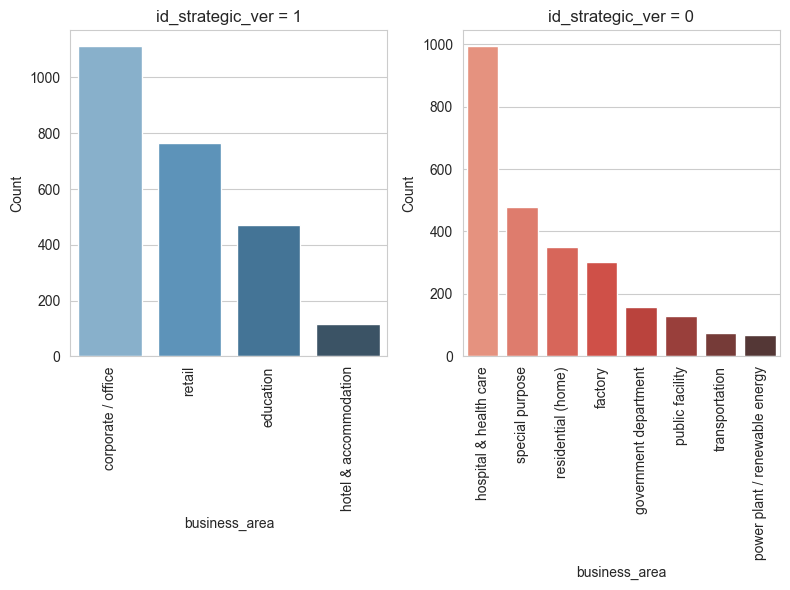

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['customer_type'] == 'End-user']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_ver_cus_1 = df_train_id[df_train_id['ver_cus'] == 1]
df_train_ver_cus_0 = df_train_id[df_train_id['ver_cus'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_ver_cus_1 = df_train_ver_cus_1['business_area'].value_counts()
count_ver_cus_0 = df_train_ver_cus_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_ver_cus_1.index, y=count_ver_cus_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_ver_cus_0.index, y=count_ver_cus_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


#### 23. ver_pro

특정 Vertical Level 1(사업영역) 이면서   
특정 Product Category(제품 유형)인   
경우에 대한 가중치

In [88]:
df_train['ver_pro'].value_counts()

ver_pro
0    56286
1     3013
Name: count, dtype: int64

In [89]:
df_train['product_category'].value_counts()

product_category
Digital Signage            15435
Air Conditioner            13454
TV and Display              4071
Others                      3681
Heating and Ventilation     2273
Medical Display             1011
Name: count, dtype: int64

In [90]:
find_ver_pro = df_train[df_train['ver_pro'] == 1]
find_ver_pro['product_category'].value_counts()

product_category
Digital Signage    2737
TV and Display      273
Others                3
Name: count, dtype: int64

In [91]:
find_ver_pro_test = df_test[df_test['ver_pro'] == 1]
find_ver_pro_test['product_category'].value_counts()

product_category
Digital Signage    334
TV and Display      95
Name: count, dtype: int64

product_category에서 Digital Signage, TV and Display 영역과 관련있음을 알수 있음

product_category가 Digital Signage일때 business_area 값 관찰

In [92]:
DS = find_ver_pro[find_ver_pro['product_category'] == 'Digital Signage']

In [93]:
DS['business_area'].value_counts()

business_area
corporate / office    1557
retail                1180
Name: count, dtype: int64

product_category가 TV and Display일때 business_area 값 관찰

In [94]:
TD = find_ver_pro[find_ver_pro['product_category'] == 'TV and Display']

In [95]:
TD['business_area'].value_counts()

business_area
hotel & accommodation    259
corporate / office         8
retail                     6
Name: count, dtype: int64

In [96]:
find_ver_pro = df_train[df_train['ver_pro'] == 1]
find_ver_pro['business_area'].value_counts()

business_area
corporate / office       1566
retail                   1188
hotel & accommodation     259
Name: count, dtype: int64

In [97]:
find_ver_pro = df_test[df_test['ver_pro'] == 1]
find_ver_pro['business_area'].value_counts()

business_area
corporate / office       201
retail                   133
hotel & accommodation     95
Name: count, dtype: int64

product_category가 Digital Signage 또는 TV and Display일때 business_area 값 관찰한 결과  
유의미한 범주성을 확인하지 못한다고 판단함

business_area에서 'corporate / office', 'retail', 'hotel & accommodation' 영역과 관련있음을 알수 있음

ver_cus와 ver_pro의 활용

In [98]:
# ver_cus와 ver_pro가 모두 0인 데이터 찾기
ver_0 = df_train[(df_train['ver_cus'] == 0) & (df_train['ver_pro'] == 0)]

# df_train에서 ver_cus = 1인 데이터 찾기
ver_cus_1 = df_train[(df_train['ver_cus'] == 1) & (df_train['ver_pro'] == 0)]

# df_train에서 ver_pro = 1인 데이터 찾기
ver_pro_1 = df_train[(df_train['ver_cus'] == 0) & (df_train['ver_pro'] == 1)]

# ver_cus와 ver_pro가 모두 1인 데이터 찾기
ver_1 = df_train[(df_train['ver_cus'] == 1) & (df_train['ver_pro'] == 1)]

In [99]:
# ver_cus = 0이고 ver_pro = 0인 경우의 전환 고객 비율 계산
conversion_rate_ver_0 = ver_0['is_converted'].mean()

# ver_cus = 1이고 ver_pro = 0인 경우의 전환 고객 비율 계산
conversion_rate_ver_cus_1 = ver_cus_1['is_converted'].mean()

# ver_cus = 0이고 ver_pro = 1인 경우의 전환 고객 비율 계산
conversion_rate_ver_pro_1 = ver_pro_1['is_converted'].mean()

# ver_cus와 ver_pro가 모두 1인 경우의 전환 고객 비율 계산
conversion_rate_ver_cus_and_pro_1 = ver_1['is_converted'].mean()

# 결과 출력
print("Conversion rate when ver_cus = 0 and ver_pro = 0:", conversion_rate_ver_0)
print("Conversion rate when ver_cus = 1 and ver_pro = 0:", conversion_rate_ver_cus_1)
print("Conversion rate when ver_cus = 0 and ver_pro = 1:", conversion_rate_ver_pro_1)
print("Conversion rate when both ver_cus and ver_pro are 1:", conversion_rate_ver_cus_and_pro_1)

Conversion rate when ver_cus = 0 and ver_pro = 0: 0.07928402789216493
Conversion rate when ver_cus = 1 and ver_pro = 0: 0.14571948998178508
Conversion rate when ver_cus = 0 and ver_pro = 1: 0.050159598723210214
Conversion rate when both ver_cus and ver_pro are 1: 0.2048780487804878


In [100]:
import numpy as np

# 조건에 따라 새로운 열 생성
conditions = [
    (df_train['ver_cus'] == 0) & (df_train['ver_pro'] == 0),
    (df_train['ver_cus'] == 0) & (df_train['ver_pro'] == 1),
    (df_train['ver_cus'] == 1) & (df_train['ver_pro'] == 0),
    (df_train['ver_cus'] == 1) & (df_train['ver_pro'] == 1)
]

choices = [0.07, 0.05, 0.15, 0.20]

# np.select를 사용하여 새로운 열 생성
df_train['ver_cus_ver_pro_weight'] = np.select(conditions, choices, default=0)

# 결과 확인
df_train['ver_cus_ver_pro_weight'].value_counts()

ver_cus_ver_pro_weight
0.07    54639
0.05     2193
0.15     1647
0.20      820
Name: count, dtype: int64

In [101]:
import numpy as np

# 조건에 따라 새로운 열 생성
conditions = [
    (df_test['ver_cus'] == 0) & (df_test['ver_pro'] == 0),
    (df_test['ver_cus'] == 0) & (df_test['ver_pro'] == 1),
    (df_test['ver_cus'] == 1) & (df_test['ver_pro'] == 0),
    (df_test['ver_cus'] == 1) & (df_test['ver_pro'] == 1)
]

choices = [0.07, 0.05, 0.15, 0.20]

# np.select를 사용하여 새로운 열 생성
df_test['ver_cus_ver_pro_weight'] = np.select(conditions, choices, default=0)

# 결과 확인
df_test['ver_cus_ver_pro_weight'].value_counts()

ver_cus_ver_pro_weight
0.07    4377
0.15     465
0.20     309
0.05     120
Name: count, dtype: int64

#### 24. ver_win_rate_x

전체 Lead 중에서 Vertical을 기준으로  
[a] Vertical 수 비율  
[b] Vertical 별 Lead 수 대비 영업 전환 성공 비율 값  
[a] , [b] 를 곱한 값

In [102]:
df_train['ver_win_rate_x'].value_counts()

ver_win_rate_x
0.003079    4097
0.001183    3011
0.000717    2013
0.000543    1929
0.000298    1818
0.000572    1727
0.000060    1199
0.000215    1035
0.000097     650
0.000026     519
0.000013     306
0.000002     113
Name: count, dtype: int64

In [103]:
df_train['ver_win_rate_x'].value_counts().sum()

18417

In [104]:
# # 각 Vertical 별 Lead 수를 계산합니다.
# vertical_lead_counts = df_train['business_area'].value_counts()

# # 전체 Lead 수를 계산합니다.
# total_leads = len(df_train)

# # [a] Vertical 수 비율을 계산합니다.
# vertical_ratios = vertical_lead_counts / total_leads

# # 각 Vertical에서 영업 전환이 성공한 Lead 수를 계산합니다.
# successful_leads = df_train[df_train['is_converted'] == True]['business_area'].value_counts()

# # [b] Vertical 별 Lead 수 대비 영업 전환 성공 비율을 계산합니다.
# conversion_ratios = successful_leads / vertical_lead_counts

# # [a]와 [b]를 곱하여 ver_win_rate_x를 계산합니다.
# ver_win_rate_x = vertical_ratios * conversion_ratios

# # ver_win_rate_x 값을 df_train에 추가합니다.
# df_train['ver_win_rate_x'] = df_train['business_area'].map(ver_win_rate_x)


In [105]:
# df_train['ver_win_rate_x'].value_counts()

In [106]:
# df_train['ver_win_rate_x'].value_counts().sum()

(궁금하면 주석풀고 코드 돌려보길)
원래값과 계산해서 넣어주고 나서의 값개수 동일  
-> 값의 개수가 늘어나지 않는것을 보면 값 따로 처리할 필요 없어 보임

계산식이 타겟변수를 건드리는 시점부터 직접계산하는 과정에서 데이터리킹현상 발생

결측치 확인

In [107]:
print(df_train['ver_win_rate_x'].isnull().sum())

40882


In [108]:
# 'com_reg_ver_win_rate' 변수에서 NaN 값을 0으로 대체
df_train['ver_win_rate_x'] = df_train['ver_win_rate_x'].fillna(0)
df_test['ver_win_rate_x'] = df_test['ver_win_rate_x'].fillna(0)

In [109]:
print(df_train['ver_win_rate_x'].isnull().sum())

0


#### 25. ver_win_ratio_per_bu

특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산

In [110]:
df_train['ver_win_ratio_per_bu'].value_counts()

ver_win_ratio_per_bu
0.064566    2460
0.049840    2028
0.020121    1365
0.048630    1356
0.026846    1278
0.064070    1075
0.071345     984
0.011583     788
0.022634     713
0.060924     540
0.079412     421
0.036913     403
0.035484     385
0.031579     271
0.053571     216
0.051471     210
0.028777     200
0.022727     173
0.128571     156
0.131148     148
0.227273      62
0.285714      43
0.034483      29
Name: count, dtype: int64

In [111]:
df_train['ver_win_ratio_per_bu'].value_counts().sum()

15304

In [112]:
# business_area와 business_unit을 기준으로 데이터 그룹화
grouped_data = df_train.groupby(['business_area', 'business_unit'])

# 각 business_unit 별 전체 데이터 수 계산
total_counts = grouped_data.size()

# 각 business_unit 별 영업 전환된 데이터 수 계산
converted_counts = grouped_data['is_converted'].sum()

# 영업 전환된 데이터 비율 계산
conversion_rates = converted_counts / total_counts

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'Total Counts': total_counts,
    'Converted Counts': converted_counts,
    'Conversion Rate': conversion_rates
}).reset_index()

result_df

business_area business_unit  Total Counts  \
0               corporate / office            AS          1278   
1               corporate / office            ID          2460   
2               corporate / office            IT           330   
3               corporate / office      Solution            29   
4                        education            AS           210   
5                        education            ID          1356   
6                        education            IT           150   
7                        education      Solution            11   
8                          factory            AS           403   
9                          factory            ID           540   
10                         factory            IT            83   
11                         factory      Solution             9   
12           government department            AS           173   
13           government department            ID           421   
14           government department            IT            49   
15           government department      Solution             7   
16          hospital & health care            AS           156   
17          hospital & health care            ID           148   
18          hospital & health care            IT           895   
19           hotel & accommodation            AS           207   
20           hotel & accommodation            ID           984   
21           hotel & accommodation            IT           791   
22           hotel & accommodation      Solution            31   
23  power plant / renewable energy            AS            62   
24  power plant / renewable energy            ID            43   
25  power plant / renewable energy            IT             8   
26                 public facility            AS           200   
27                 public facility            ID           271   
28                 public facility            IT            40   
29                 public facility      Solution             8   
30              residential (home)            AS          1365   
31              residential (home)            ID           385   
32              residential (home)            IT            42   
33              residential (home)      Solution            26   
34                          retail            AS           788   
35                          retail            ID          2028   
36                          retail            IT           163   
37                          retail      Solution            32   
38                 special purpose            AS           713   
39                 special purpose            ID          1075   
40                 special purpose            IT           108   
41                 special purpose      Solution            33   
42                  transportation            AS            53   
43                  transportation            ID           216   
44                  transportation            IT            33   
45                  transportation      Solution             4   

    Converted Counts  Conversion Rate  
0                 38         0.029734  
1                218         0.088618  
2                 11         0.033333  
3                  1         0.034483  
4                 14         0.066667  
5                 88         0.064897  
6                  7         0.046667  
7                  0         0.000000  
8                 24         0.059553  
9                 37         0.068519  
10                28         0.337349  
11                 0         0.000000  
12                 7         0.040462  
13                32         0.076010  
14                 0         0.000000  
15                 0         0.000000  
16                15         0.096154  
17                19         0.128378  
18               339         0.378771  
19                 1         0.004831  
20               117         0.118902  
21                 2         0.002528 

위의 그룹과 같이 계산하여 해당 그룹에 대해서 값을 넣어주는 작업을 진행

값수치 조금 다른값들 업데이트 및 nan값에 대해서는 값을 채워줌

In [113]:
# business_area와 business_unit을 기준으로 데이터 그룹화
grouped_data = df_train.groupby(['business_area', 'business_unit'])

# 각 그룹의 첫 5개의 행을 출력
for name, group in grouped_data:
    print(f"Group name: {name}")
    print(group[['business_area', 'business_unit', 'com_reg_ver_win_rate']].head())


Group name: ('corporate / office', 'AS')
        business_area business_unit  com_reg_ver_win_rate
0  corporate / office            AS              0.066667
1  corporate / office            AS              0.066667
2  corporate / office            AS              0.088889
3  corporate / office            AS              0.088889
4  corporate / office            AS              0.088889
Group name: ('corporate / office', 'ID')
          business_area business_unit  com_reg_ver_win_rate
388  corporate / office            ID              0.057534
389  corporate / office            ID              0.057534
390  corporate / office            ID              0.057534
391  corporate / office            ID              0.057534
392  corporate / office            ID              0.057534
Group name: ('corporate / office', 'IT')
           business_area business_unit  com_reg_ver_win_rate
1557  corporate / office            IT              0.066667
1558  corporate / office            IT         

In [114]:
# business_area와 business_unit을 기준으로 데이터 그룹화
grouped_data = df_train.groupby(['business_area', 'business_unit'])

# 각 business_unit 별 전체 데이터 수 계산
total_counts = grouped_data.size()

# 각 business_unit 별 영업 전환된 데이터 수 계산
converted_counts = grouped_data['is_converted'].sum()

# 영업 전환된 데이터 비율 계산
conversion_rates = converted_counts / total_counts

# conversion_rates를 데이터프레임으로 변환하고 인덱스를 초기화
conversion_rates_df = conversion_rates.reset_index().rename(columns={0: 'ver_win_ratio_per_bu'})

# df_train에 conversion_rates_df를 병합하고, 'ver_win_ratio_per_bu' 열을 업데이트
df_train = df_train.drop(columns='ver_win_ratio_per_bu')
df_train = pd.merge(df_train, conversion_rates_df, on=['business_area', 'business_unit'], how='left')

df_train['ver_win_ratio_per_bu'].fillna(0, inplace=True)


In [115]:
# business_area와 business_unit을 기준으로 데이터 그룹화
grouped_data = df_test.groupby(['business_area', 'business_unit'])

# 각 business_unit 별 전체 데이터 수 계산
total_counts = grouped_data.size()

# 각 business_unit 별 영업 전환된 데이터 수 계산
converted_counts = grouped_data['is_converted'].sum()

# 영업 전환된 데이터 비율 계산
conversion_rates = converted_counts / total_counts

# conversion_rates를 데이터프레임으로 변환하고 인덱스를 초기화
conversion_rates_df = conversion_rates.reset_index().rename(columns={0: 'ver_win_ratio_per_bu'})

# df_test에 conversion_rates_df를 병합하고, 'ver_win_ratio_per_bu' 열을 업데이트
df_test = df_test.drop(columns='ver_win_ratio_per_bu')
df_test = pd.merge(df_test, conversion_rates_df, on=['business_area', 'business_unit'], how='left')

df_test['ver_win_ratio_per_bu'].fillna(0, inplace=True)


In [116]:
df_train['ver_win_ratio_per_bu'].value_counts().sum()

59299

#### 26. business_area

고객의 사업 영역

In [117]:
df_train['business_area'].value_counts()

business_area
corporate / office                4097
retail                            3011
hotel & accommodation             2013
special purpose                   1929
residential (home)                1818
education                         1727
hospital & health care            1199
factory                           1035
government department              650
public facility                    519
transportation                     306
power plant / renewable energy     113
Name: count, dtype: int64

#### 27. business_subarea

고객의 세부 사업 영역

In [118]:
df_train['business_subarea'].value_counts()

business_subarea
Others                                     1740
Other Stores                                280
Hospital                                    267
Manufacturing Factory / Plant               196
Construction                                191
Higher Education (College & University)     186
Engineering                                 183
Villa / Single-Family Home                  172
Apartment                                   163
Electronics & Telco                         135
K12 Kindergarten & Schools                  134
IT/Software                                 132
Advertising                                 120
Institute & Academy                         105
Clinic                                      104
Mixed-use (Multi Complex)                   104
Fashion                                      98
General Government Office                    91
Cruise                                       80
General Hospital                             63
Consulting             

#### 28. lead_owner

영업 담당자 이름

In [119]:
df_train['lead_owner'].value_counts()

lead_owner
174     4627
175     4120
97      2499
23      2453
194     2208
42      1215
96       981
185      880
363      839
115      734
38       693
125      690
402      490
108      487
124      468
816      464
341      462
167      459
100      457
0        429
68       427
16       413
487      405
176      374
40       355
342      346
662      327
422      326
27       317
359      305
205      304
39       304
15       301
279      294
441      281
25       272
155      271
103      270
233      265
374      257
405      246
393      238
589      237
46       235
21       228
831      227
78       223
436      219
148      216
642      215
153      215
694      213
654      208
384      204
187      200
45       198
788      195
638      180
717      171
29       168
414      165
391      163
81       153
285      151
214      151
344      150
71       150
388      148
225      148
166      146
480      146
798      145
435      145
20       144
234      143
423      142
2

#### 29. is_converted (Target)

영업 성공 여부 
True일 시 성공 (True or False 값을 가짐)

In [120]:
df_train['is_converted'].value_counts()

is_converted
False    54449
True      4850
Name: count, dtype: int64

### 레이블 인코딩

In [121]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

# df_train과 df_test를 복사하여 새로운 데이터프레임을 생성
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# 레이블 인코딩 적용
for col in label_columns:
    encoder = LabelEncoder()
    combined_data = pd.concat([df_train_encoded[col], df_test_encoded[col]])
    encoder.fit(combined_data)
    df_train_encoded[col] = encoder.transform(df_train_encoded[col])
    df_test_encoded[col] = encoder.transform(df_test_encoded[col])


### 상관관계 히트맵

In [122]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         59299 non-null  int32  
 2   business_unit            59299 non-null  int32  
 3   com_reg_ver_win_rate     59299 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            59299 non-null  int32  
 6   enterprise               59299 non-null  int32  
 7   historical_existing_cnt  59299 non-null  float64
 8   id_strategic_ver         59299 non-null  float64
 9   it_strategic_ver         59299 non-null  float64
 10  idit_strategic_ver       59299 non-null  float64
 11  customer_job             59299 non-null  int32  
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             59299 non-null  int32  
 14  product_category      

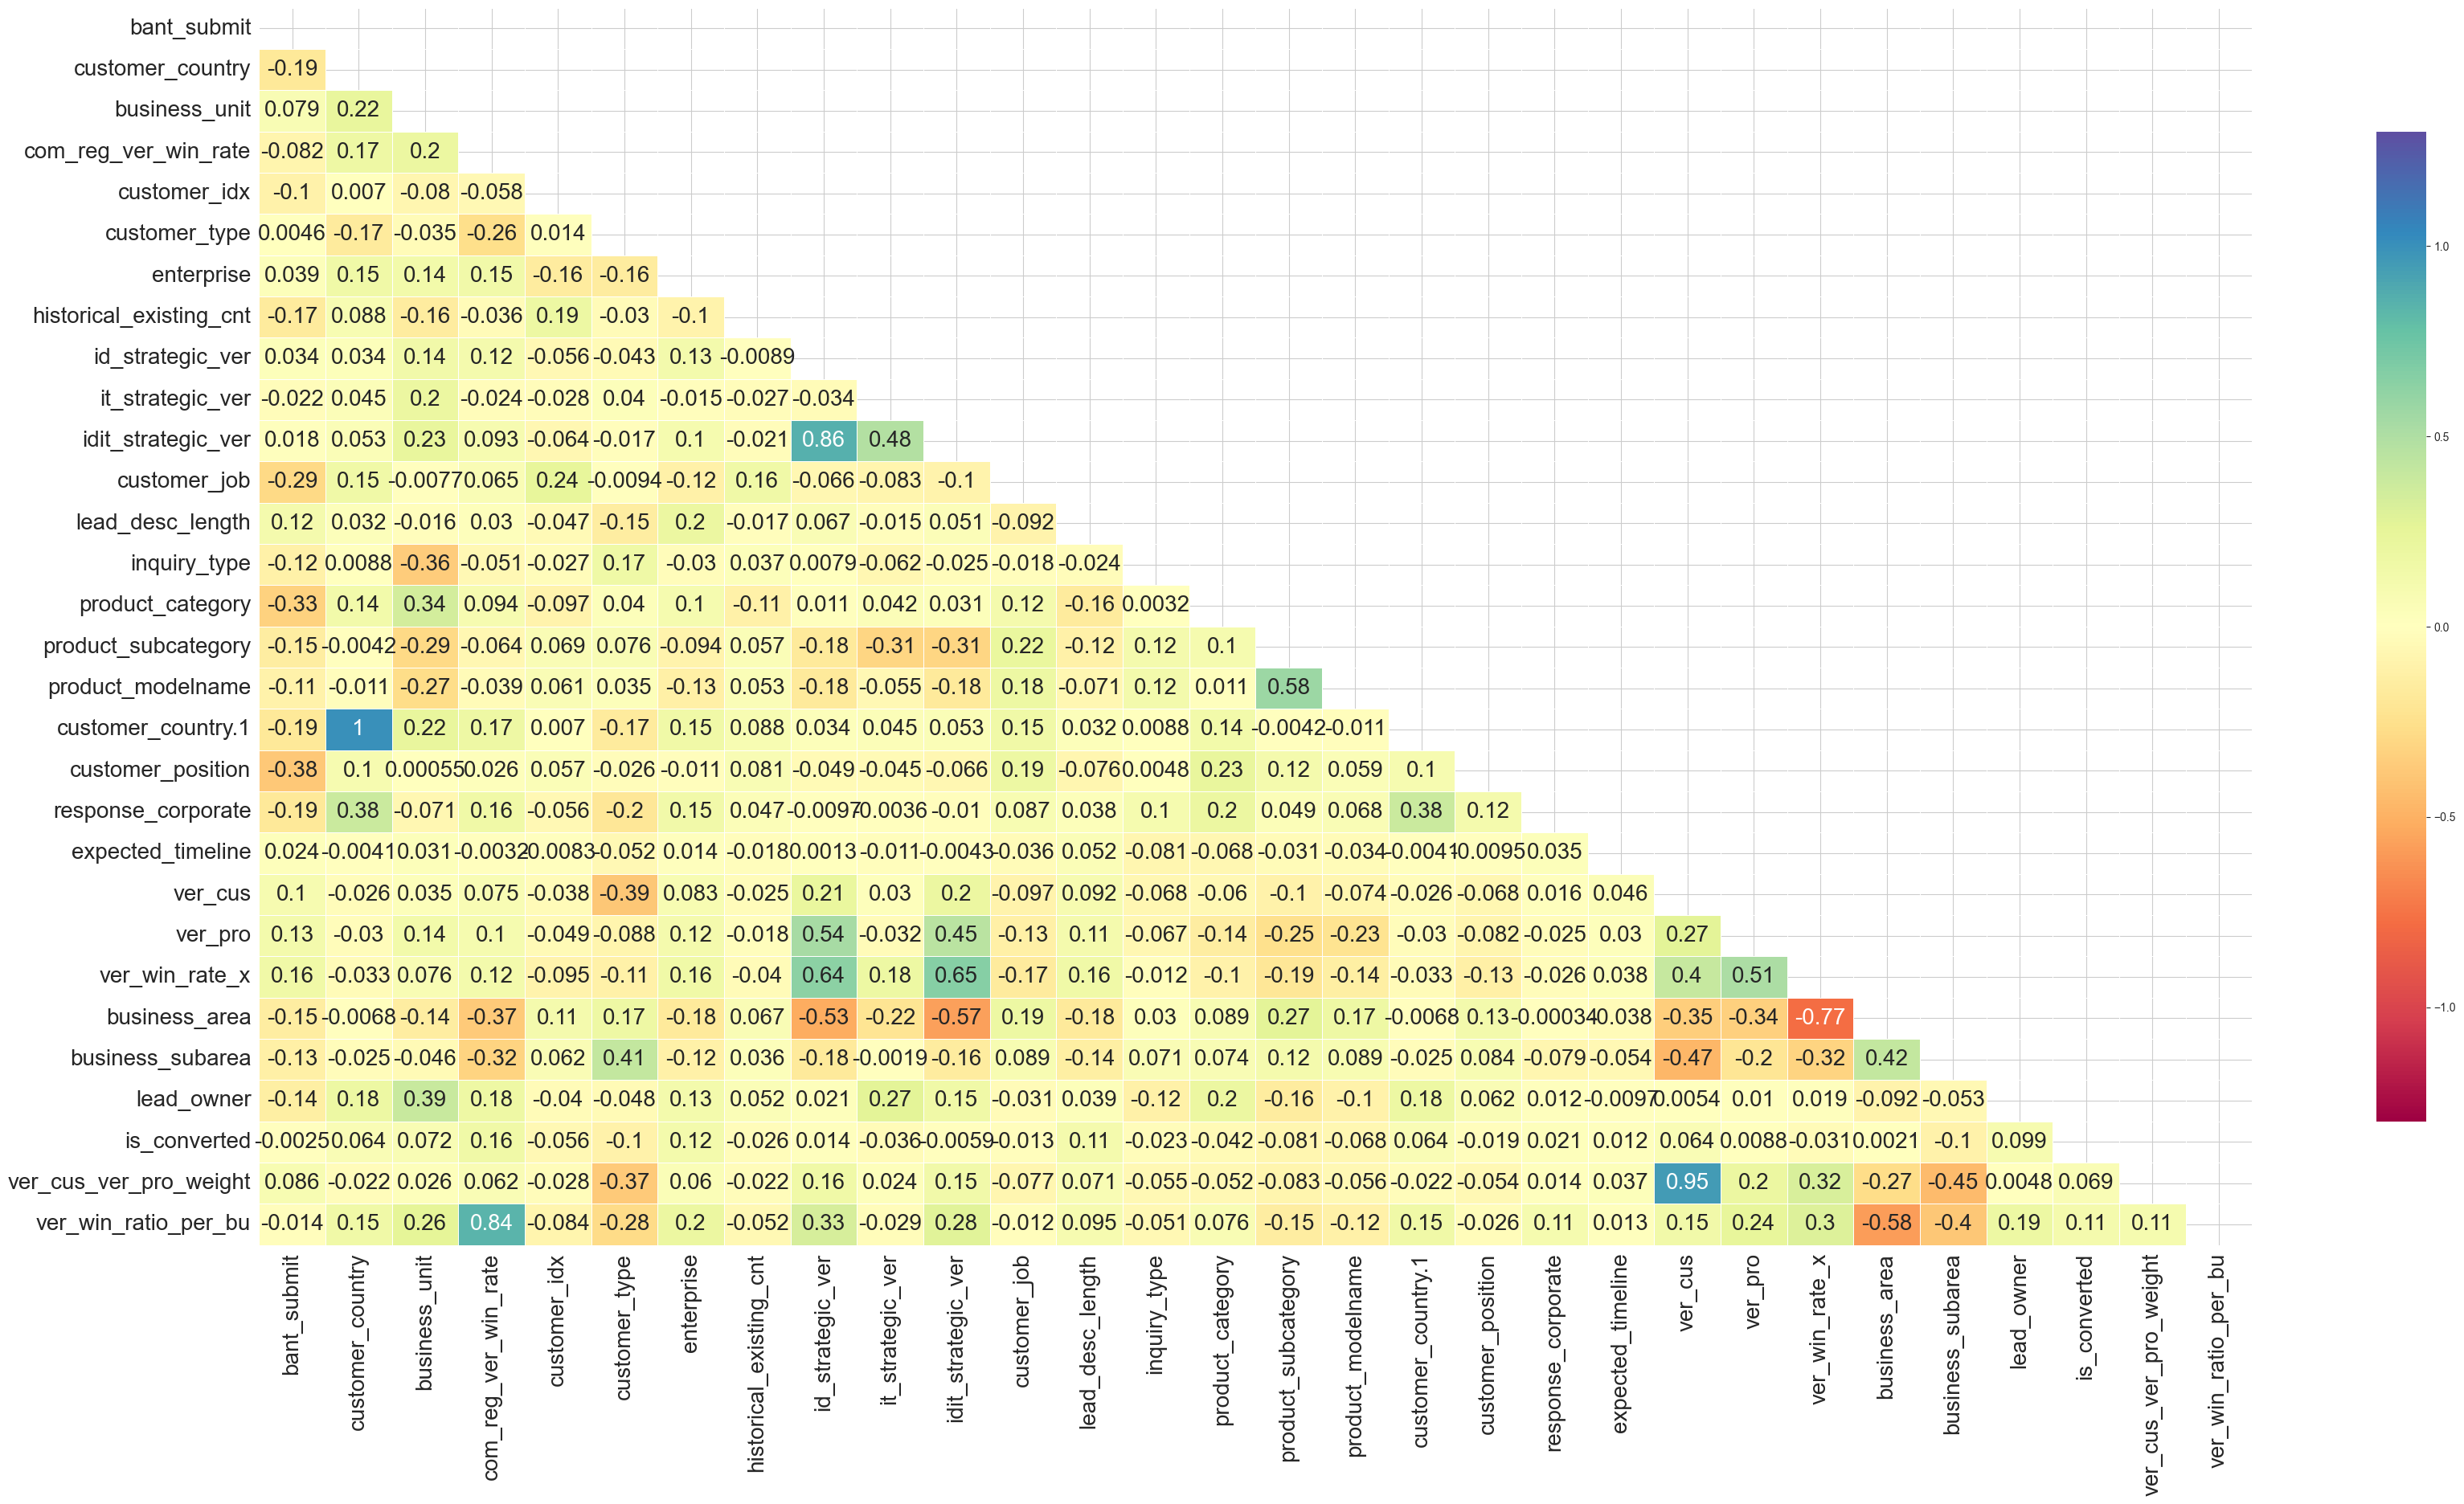

In [123]:
import numpy as np

# 숫자형 변수들 간의 상관관계 계산
corr = df_train_encoded.corr()

# 상관계수 행렬의 상삼각행렬을 마스킹하기 위한 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵
plt.figure(figsize=(40, 20))

sns.heatmap(corr,
            mask=mask, # 마스크 적용
            annot=True, # 수치(상관관계) 표시
            annot_kws = {'size':20}, # 수치표시 사이즈
            cmap='Spectral', # 색상 변경
            vmin=-1.3, # 색상 팔레트 범위
            vmax=1.3,
            linewidths=.5, # 히트맵의 선 스타일 변경
            cbar_kws={"shrink": .8}) # 히트맵 주변에 색상 바 추가(사이즈 조절 가능)

# 변수 이름의 크기 조절
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


customer_country.1 변수 제거

In [124]:
df_train_encoded = df_train_encoded.drop(['customer_country.1'], axis=1)
df_test_encoded = df_test_encoded.drop(['customer_country.1'], axis=1)

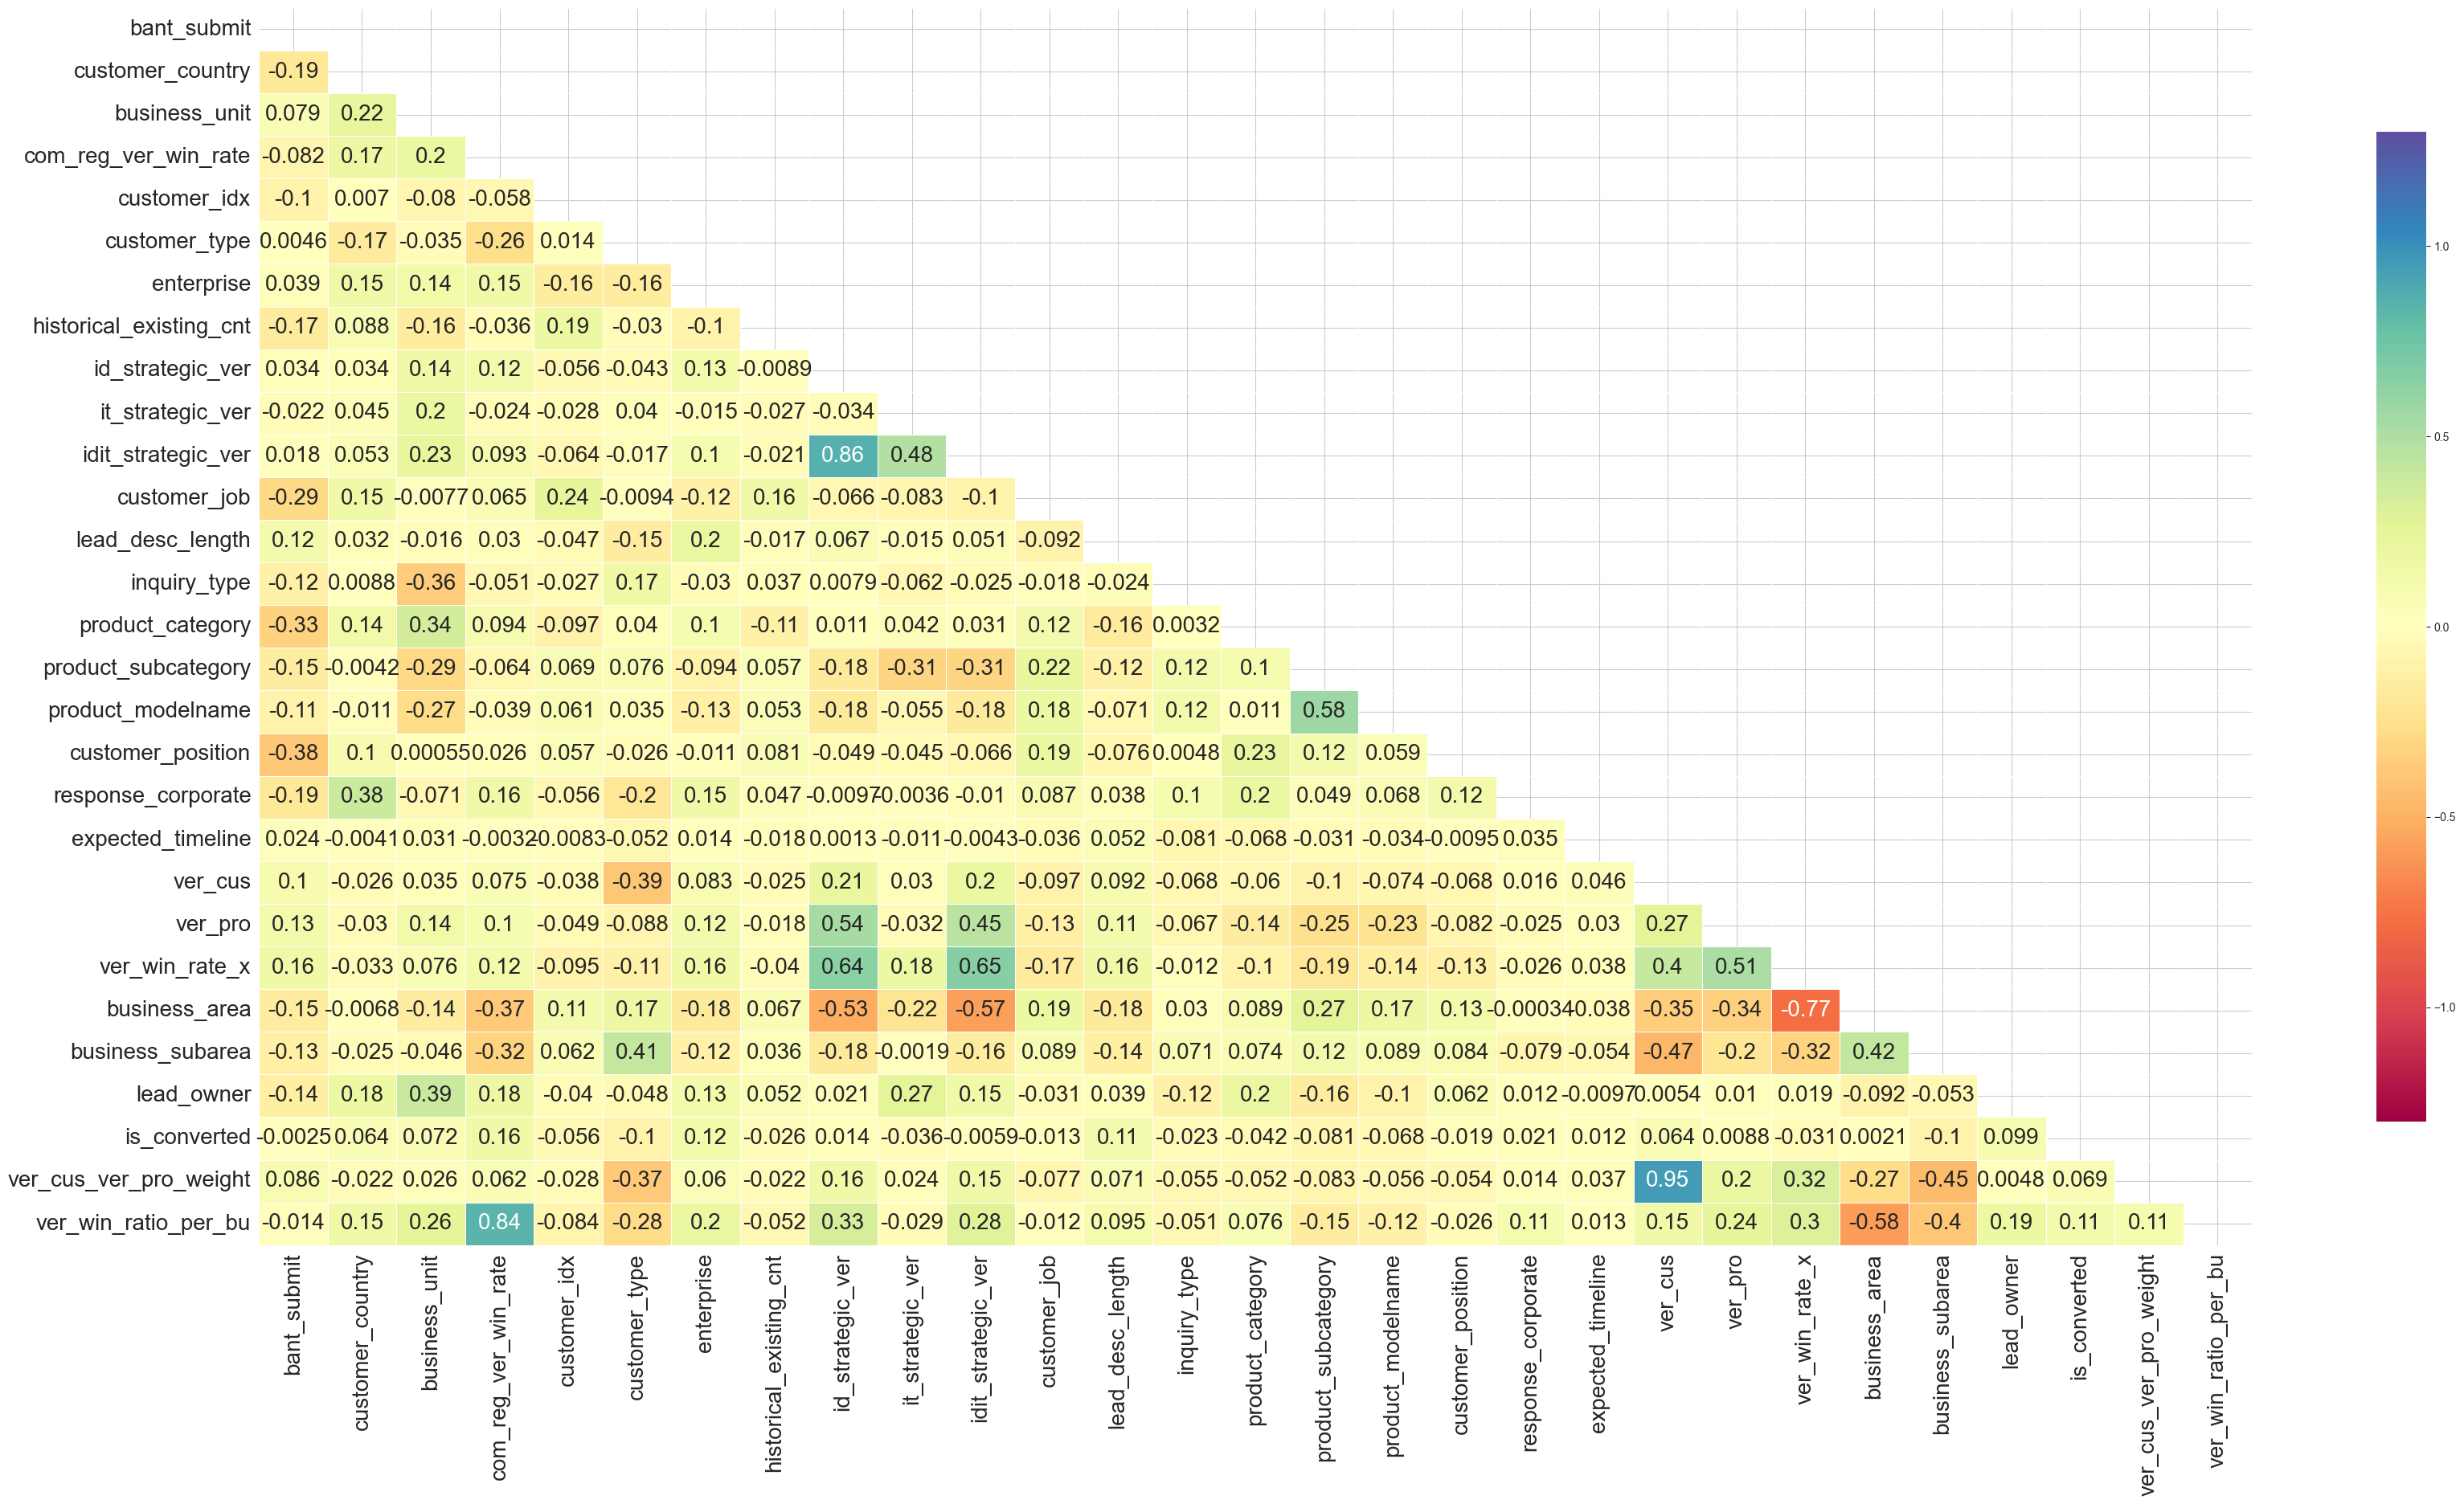

In [125]:
import numpy as np

# 숫자형 변수들 간의 상관관계 계산
corr = df_train_encoded.corr()

# 상관계수 행렬의 상삼각행렬을 마스킹하기 위한 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵
plt.figure(figsize=(40, 20))

sns.heatmap(corr,
            mask=mask, 
            annot=True, 
            annot_kws = {'size':20}, 
            cmap='Spectral', 
            vmin=-1.3, 
            vmax=1.3,
            linewidths=.5, 
            cbar_kws={"shrink": .8}) 

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


In [126]:
df_train_encoded = df_train_encoded.drop(['ver_cus_ver_pro_weight'], axis=1)
df_test_encoded = df_test_encoded.drop(['ver_cus_ver_pro_weight'], axis=1)

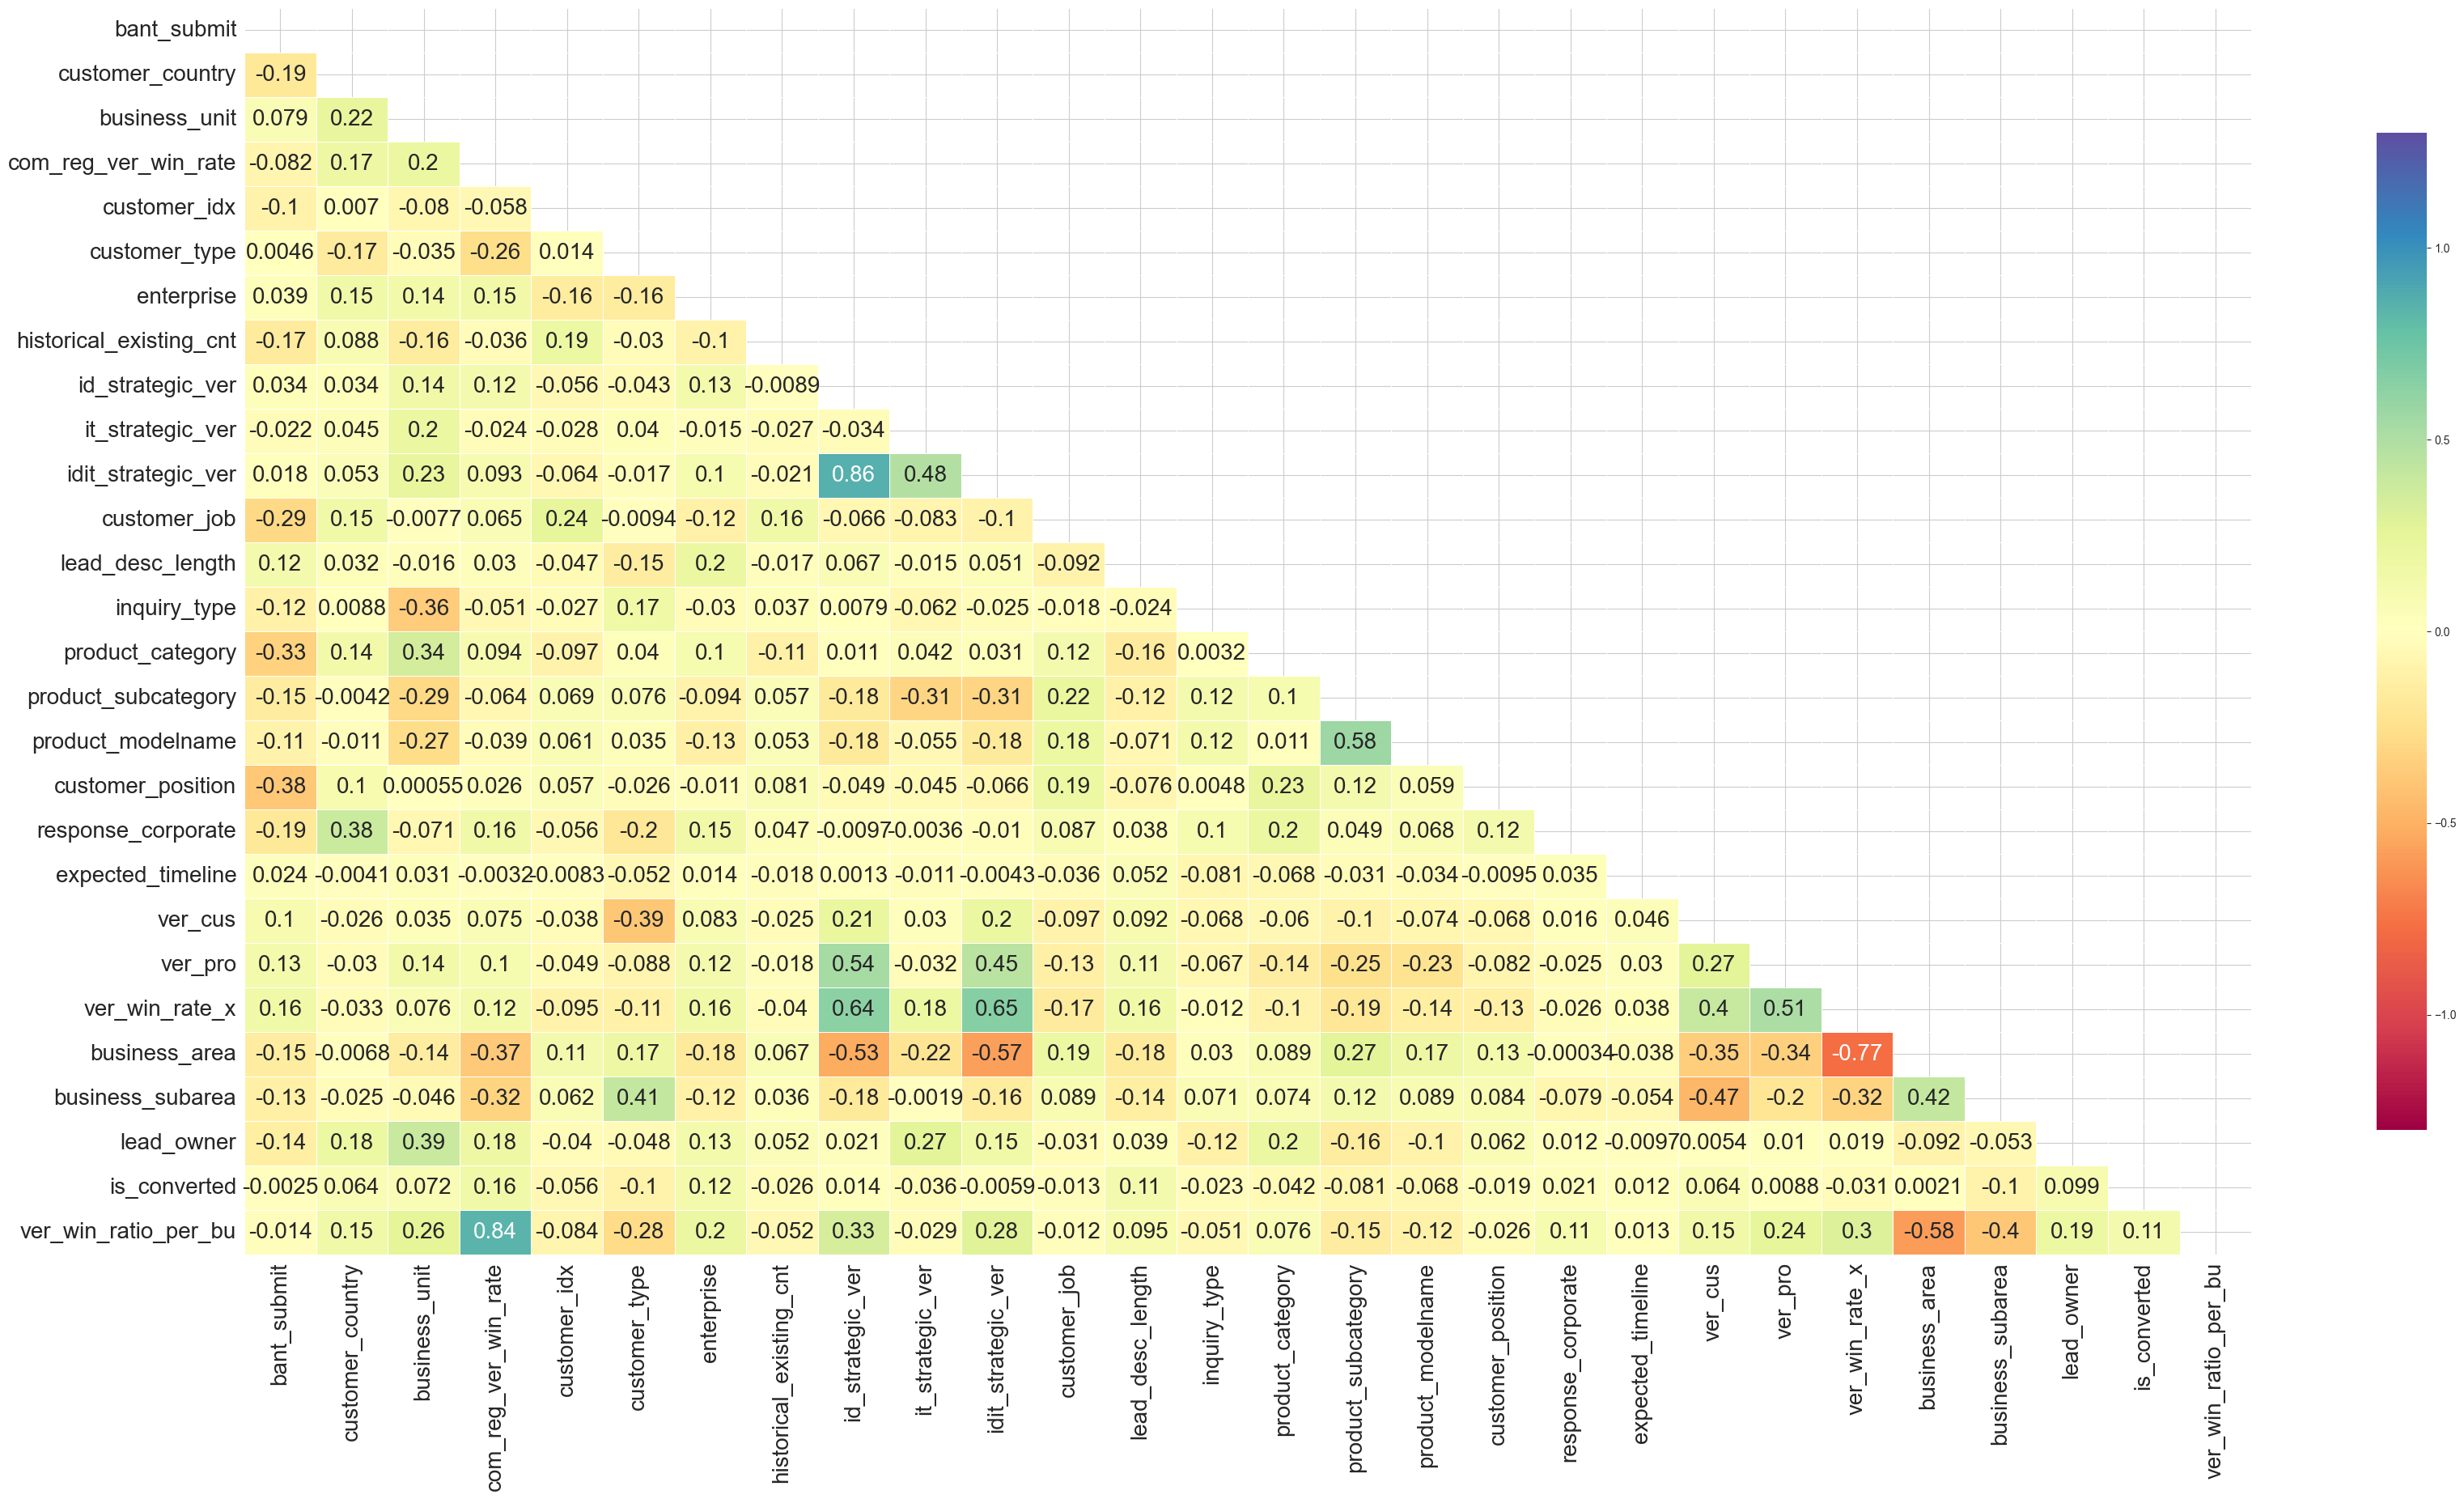

In [127]:
import numpy as np

# 숫자형 변수들 간의 상관관계 계산
corr = df_train_encoded.corr()

# 상관계수 행렬의 상삼각행렬을 마스킹하기 위한 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵
plt.figure(figsize=(40, 20))

sns.heatmap(corr,
            mask=mask, 
            annot=True, 
            annot_kws = {'size':20}, 
            cmap='Spectral', 
            vmin=-1.3, 
            vmax=1.3,
            linewidths=.5, 
            cbar_kws={"shrink": .8}) 

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                 features
0     7.581877              bant_submit
1     6.276674         customer_country
2     4.525680            business_unit
3     4.126420     com_reg_ver_win_rate
4     4.875023             customer_idx
5    12.144762            customer_type
6     1.860805               enterprise
7     1.183844  historical_existing_cnt
8          inf         id_strategic_ver
9          inf         it_strategic_ver
10         inf       idit_strategic_ver
11    5.024307             customer_job
12    1.518781         lead_desc_length
13    7.071459             inquiry_type
14    3.772742         product_category
15   30.171535      product_subcategory
16   33.016294        product_modelname
17    6.557144        customer_position
18    7.921217       response_corporate
19    7.670475        expected_timeline
20    1.510611                  ver_cus
21    1.845977                  ver_pro
22    4.502053           ver_win_rate_x
23   28.113428            business_area


inf 뜨는 이유  
-> id_strategic_ver, it_strategic_ver, idit_strategic_ver 의 값이 0과 1로 이루어져서 발생

In [129]:
df_train_encoded = df_train_encoded.drop(['product_subcategory', 'business_subarea'], axis=1)
df_test_encoded = df_test_encoded.drop(['product_subcategory', 'business_subarea'], axis=1)

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                 features
0     7.322671              bant_submit
1     6.241418         customer_country
2     4.415047            business_unit
3     4.096960     com_reg_ver_win_rate
4     4.811426             customer_idx
5    10.562814            customer_type
6     1.852796               enterprise
7     1.183430  historical_existing_cnt
8          inf         id_strategic_ver
9          inf         it_strategic_ver
10         inf       idit_strategic_ver
11    4.979580             customer_job
12    1.514608         lead_desc_length
13    6.961614             inquiry_type
14    3.705685         product_category
15   21.245135        product_modelname
16    6.359581        customer_position
17    7.883046       response_corporate
18    7.526290        expected_timeline
19    1.457267                  ver_cus
20    1.820568                  ver_pro
21    4.264581           ver_win_rate_x
22   23.359913            business_area
23    3.040534               lead_owner


In [131]:
df_train_encoded = df_train_encoded.drop(['product_modelname', 'business_area'], axis=1)
df_test_encoded = df_test_encoded.drop(['product_modelname', 'business_area'], axis=1)

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                 features
0     6.226194              bant_submit
1     6.153439         customer_country
2     4.299336            business_unit
3     4.065629     com_reg_ver_win_rate
4     4.636907             customer_idx
5     9.626122            customer_type
6     1.848728               enterprise
7     1.182329  historical_existing_cnt
8          inf         id_strategic_ver
9          inf         it_strategic_ver
10         inf       idit_strategic_ver
11    4.608227             customer_job
12    1.513654         lead_desc_length
13    6.622472             inquiry_type
14    3.612684         product_category
15    5.949679        customer_position
16    7.630843       response_corporate
17    7.092409        expected_timeline
18    1.446666                  ver_cus
19    1.710508                  ver_pro
20    2.814369           ver_win_rate_x
21    3.001592               lead_owner
22    5.075264     ver_win_ratio_per_bu


In [133]:
df_train_encoded = df_train_encoded.drop(['idit_strategic_ver'], axis=1)
df_test_encoded = df_test_encoded.drop(['idit_strategic_ver'], axis=1)

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                 features
0     6.226194              bant_submit
1     6.153439         customer_country
2     4.299336            business_unit
3     4.065629     com_reg_ver_win_rate
4     4.636907             customer_idx
5     9.626122            customer_type
6     1.848728               enterprise
7     1.182329  historical_existing_cnt
8     2.278229         id_strategic_ver
9     1.275740         it_strategic_ver
10    4.608227             customer_job
11    1.513654         lead_desc_length
12    6.622472             inquiry_type
13    3.612684         product_category
14    5.949679        customer_position
15    7.630843       response_corporate
16    7.092409        expected_timeline
17    1.446666                  ver_cus
18    1.710508                  ver_pro
19    2.814369           ver_win_rate_x
20    3.001592               lead_owner
21    5.075264     ver_win_ratio_per_bu


### 2-2. 학습, 검증 데이터 분리

In [135]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train_encoded.drop("is_converted", axis=1),
    df_train_encoded["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

단일모델 기준으로 사용할수 있는 모델들 라이브러리 불러오는 코드에 작성해둠

### 모델 라이브러리

In [136]:
# 모델 라이브러리
## 단일모델로는 이와같은 모델정도 있으니깐 참고
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# 스테킹
from sklearn.ensemble import StackingClassifier

### 모델 정의 

In [137]:
### 단일 모델 ###

# RandomForest
rf_model = RandomForestClassifier(
    n_estimators=800,     
    max_depth=None,        
    min_samples_split=3,   
    min_samples_leaf=3,    
    bootstrap=True
)

# LightGBM
lgb_model = LGBMClassifier(
    num_leaves=70,
    max_depth=20,
    n_estimators=750,
    learning_rate=0.01,
    min_child_samples=20,
    verbose = -1
)

# CatBoost
cat_model = CatBoostClassifier(
    iterations=450,
    learning_rate=0.05,
    depth=10,
    verbose=False
)

# XGBoost 
xgb_model = XGBClassifier(
    n_estimators=450,
    learning_rate=0.03,
    max_depth=10,
    objective='binary:logistic'
)

# GradientBoosting
gb_model = GradientBoostingClassifier(
    n_estimators=500,   # 500이상 해야됨
    learning_rate=0.05, # 0.05 이하로 해야됨
    max_depth=5,        # 10 이하로 해야됨
    min_samples_leaf=2
)

# DecisionTree
dt_model = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=50,  # 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf=2,  # 리프 노드에 필요한 최소 샘플 수
)  

# ExtraTrees
et_model = ExtraTreesClassifier(n_estimators=250)  

### 스태킹 분류기 생성 ###
model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lgb', lgb_model),
        ('cat', cat_model),
        ('xgb', xgb_model),
        ('gb', gb_model),
        ('dt', dt_model),
        ('et', et_model)
    ],
    final_estimator=lgb_model  # 최종 메타 모델
)

### 모델 학습

In [138]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=450, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### 모델 성능 보기

In [139]:
import pandas as pd

def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    metrics = pd.DataFrame({
        '정확도': [accuracy],
        '정밀도': [precision],
        '재현율': [recall],
        'F1 Score': [F1]
    })

    confusion_df = pd.DataFrame(confusion, index=['True', 'False'], columns=['True', 'False'])

    print("\n오차행렬:")
    display(confusion_df)
    print("평가 지표:")
    display(metrics)


In [140]:
pred = model.predict(x_val)
get_clf_eval(y_val, pred)


오차행렬:


True  False
True    712    235
False    92  10821

평가 지표:


정확도       정밀도       재현율  F1 Score
0  0.972428  0.885572  0.751848   0.81325

## 4. 제출하기

### 테스트 데이터 예측

In [141]:
# 예측에 필요한 데이터 분리
x_test = df_test_encoded.drop(["is_converted", "id"], axis=1)

In [142]:
test_pred = model.predict(x_test)
sum(test_pred) # True로 예측된 개수

563

### 제출 파일 작성

In [143]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission_ver4.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**